In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv('FROG/FROG_2025-04-03 00:00:00+00:00.csv')

In [3]:
df.head()

,ts_event,ts_event.1,rtype,publisher_id,instrument_id,action,side,depth,price,size,...,ask_sz_08,bid_ct_08,ask_ct_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09,bid_ct_09,ask_ct_09,symbol
0,2025-04-03 13:30:00.125395235+00:00,2025-04-03 13:30:00.125395235+00:00,10,2,6292,C,B,4,29.70,100,...,4,1,1,28.49,33.92,100,100,1,1,FROG
1,2025-04-03 13:30:00.125739764+00:00,2025-04-03 13:30:00.125739764+00:00,10,2,6292,A,A,3,32.79,100,...,800,1,1,28.49,33.85,100,4,1,1,FROG
2,2025-04-03 13:30:00.125745044+00:00,2025-04-03 13:30:00.125745044+00:00,10,2,6292,A,B,4,29.74,100,...,800,1,1,28.96,33.85,800,4,1,1,FROG
3,2025-04-03 13:30:00.170027597+00:00,2025-04-03 13:30:00.170027597+00:00,10,2,6292,A,B,3,29.89,100,...,800,1,1,28.97,33.85,100,4,1,1,FROG
4,2025-04-03 13:30:00.404726961+00:00,2025-04-03 13:30:00.404726961+00:00,10,2,6292,A,B,7,29.13,100,...,800,1,1,29.00,33.85,20,4,1,1,FROG


In [4]:
df.columns

Index(['ts_event', 'ts_event.1', 'rtype', 'publisher_id', 'instrument_id',
       'action', 'side', 'depth', 'price', 'size', 'flags', 'ts_in_delta',
       'sequence', 'bid_px_00', 'ask_px_00', 'bid_sz_00', 'ask_sz_00',
       'bid_ct_00', 'ask_ct_00', 'bid_px_01', 'ask_px_01', 'bid_sz_01',
       'ask_sz_01', 'bid_ct_01', 'ask_ct_01', 'bid_px_02', 'ask_px_02',
       'bid_sz_02', 'ask_sz_02', 'bid_ct_02', 'ask_ct_02', 'bid_px_03',
       'ask_px_03', 'bid_sz_03', 'ask_sz_03', 'bid_ct_03', 'ask_ct_03',
       'bid_px_04', 'ask_px_04', 'bid_sz_04', 'ask_sz_04', 'bid_ct_04',
       'ask_ct_04', 'bid_px_05', 'ask_px_05', 'bid_sz_05', 'ask_sz_05',
       'bid_ct_05', 'ask_ct_05', 'bid_px_06', 'ask_px_06', 'bid_sz_06',
       'ask_sz_06', 'bid_ct_06', 'ask_ct_06', 'bid_px_07', 'ask_px_07',
       'bid_sz_07', 'ask_sz_07', 'bid_ct_07', 'ask_ct_07', 'bid_px_08',
       'ask_px_08', 'bid_sz_08', 'ask_sz_08', 'bid_ct_08', 'ask_ct_08',
       'bid_px_09', 'ask_px_09', 'bid_sz_09', 'ask_sz_09', 

In [5]:
def concatenate_csvs(directory):
    all_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    
    list_of_dataframes = []

    for filename in all_files:
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        list_of_dataframes.append(df)

    combined_df = pd.concat(list_of_dataframes, ignore_index=True)
    combined_df['ts_event'] = pd.to_datetime(combined_df['ts_event'], format='ISO8601')
    combined_df.sort_values(by='ts_event', inplace=True)

    combined_df['mid'] = (combined_df['bid_px_00'] + combined_df['ask_px_00'])/2
    combined_df['half_spread'] = (combined_df['ask_px_00'] - combined_df['bid_px_00']) / 2
    combined_df['minutes_since_open'] = (combined_df['ts_event'] - combined_df['ts_event'].dt.normalize() - pd.Timedelta('13h30m')).dt.total_seconds() // 60
    return combined_df

In [6]:
crwv_df = concatenate_csvs('CRWV')
frog_df = concatenate_csvs('FROG')
soun_df = concatenate_csvs('SOUN')

In [7]:
print(frog_df['minutes_since_open'].unique())

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

In [8]:
# Slippage calculation at one snapshot for varying order sizes
def calc_temp_impact(sizes, prices, x, half_spread, mid):
    sizes = np.array(sizes)
    prices = np.array(prices)
    cum_sizes = np.cumsum(sizes)
    # Find how far into the book we must go
    if x <= sizes[0]:
        return half_spread
    else:
        impacted_indices = np.where(cum_sizes < x)[0]
        if not len(impacted_indices):
            k = 0
        else:
            k = impacted_indices[-1] + 1  # levels to impact
        # Slippage: weighted avg price above best
        shares_left = x
        cost = 0.0
        for i in range(k + 1):
            size_at_level = min(shares_left, sizes[i])
            cost += size_at_level * prices[i]
            shares_left -= size_at_level
        avg_price = cost / x
        slippage = avg_price - mid
        return abs(slippage)

In [23]:
def plot_temporary_impact(df, indices=range(10), percentile=0.5):
    # Group by 'minutes_since_open' and use the xth percentile row (sorted by ask_sz and bid_sz columns) for each group
    grouped = df.groupby('minutes_since_open')
    unique_minutes = sorted(df['minutes_since_open'].unique())
    selected_minutes = [unique_minutes[i] for i in indices if i < len(unique_minutes)]

    for idx, minute in enumerate(selected_minutes):
        group = grouped.get_group(minute)
        ask_sz_cols = [f'ask_sz_{i:02d}' for i in range(10)]
        bid_sz_cols = [f'bid_sz_{i:02d}' for i in range(10)]

        # For ask side (buy): sort by ask_sz columns, pick xth percentile row
        group_sorted_ask = group.sort_values(ask_sz_cols)
        ask_idx = int(percentile * (len(group_sorted_ask) - 1)) if len(group_sorted_ask) > 1 else 0
        middle_row_ask = group_sorted_ask.iloc[ask_idx]
        ask_sizes = [group[f'ask_sz_{i:02d}'].median() for i in range(10)]
        ask_prices = [middle_row_ask[f'ask_px_{i:02d}'] for i in range(10)]
        half_spread_ask = middle_row_ask['half_spread']
        mid_ask = middle_row_ask['mid']

        # For bid side (sell): sort by bid_sz columns, pick xth percentile row
        group_sorted_bid = group.sort_values(bid_sz_cols)
        bid_idx = int(percentile * (len(group_sorted_bid) - 1)) if len(group_sorted_bid) > 1 else 0
        middle_row_bid = group_sorted_bid.iloc[bid_idx]
        bid_sizes = [group[f'bid_sz_{i:02d}'].median() for i in range(10)]
        bid_prices = [middle_row_bid[f'bid_px_{i:02d}'] for i in range(10)]
        half_spread_bid = middle_row_bid['half_spread']
        mid_bid = middle_row_bid['mid']

        print(f"Minute {minute} - Sell Side:", [x for x in zip(ask_sizes, ask_prices)])
        print(f"Minute {minute} - Buy Side", [x for x in zip(bid_sizes, bid_prices)])

        # Generate order sizes for both sides
        ask_order_sizes = np.arange(1, sum(ask_sizes), 1)
        bid_order_sizes = np.arange(1, sum(bid_sizes), 1)

        # Calculate temporary impact for each order size (ask side: buy, bid side: sell)
        ask_impacts = [calc_temp_impact(ask_sizes, ask_prices, x, half_spread_ask, mid_ask) for x in ask_order_sizes]
        bid_impacts = [calc_temp_impact(bid_sizes, bid_prices, x, half_spread_bid, mid_bid) for x in bid_order_sizes]

        # Plotting
        fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

        axs[0].plot(ask_order_sizes, ask_impacts, color='blue', label='Ask Side (Buy)')
        axs[0].set_xlabel('Order Size')
        axs[0].set_ylabel('Temporary Impact (Slippage)')
        axs[0].set_title(f'Ask Side Impact - Minute {minute}')
        axs[0].legend()
        axs[0].grid(True)

        axs[1].plot(bid_order_sizes, bid_impacts, color='red', label='Bid Side (Sell)')
        axs[1].set_xlabel('Order Size')
        axs[1].set_title(f'Bid Side Impact - Minute {minute}')
        axs[1].legend()
        axs[1].grid(True)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

## Plotting temporary impact for the first 10 events for different tickets

Minute 0.0 - Sell Side: [(100.0, 37.25), (100.0, 37.27), (100.0, 37.3), (100.0, 37.33), (100.0, 37.34), (100.0, 37.35), (100.0, 37.37), (100.0, 37.39), (100.0, 37.4), (100.0, 37.43)]
Minute 0.0 - Buy Side [(100.0, 41.99), (66.0, 41.98), (71.0, 41.97), (50.0, 41.95), (69.0, 41.94), (50.0, 41.91), (50.0, 41.9), (69.0, 41.86), (100.0, 41.85), (100.0, 41.8)]


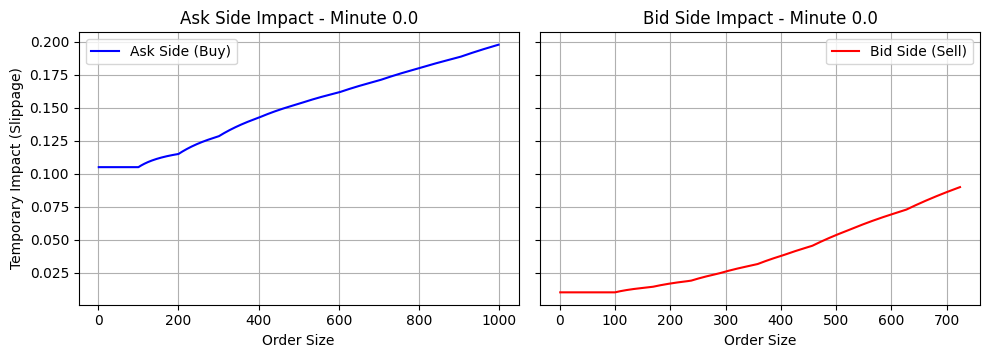

Minute 1.0 - Sell Side: [(100.0, 38.04), (100.0, 38.14), (100.0, 38.15), (100.0, 38.19), (100.0, 38.2), (100.0, 38.3), (100.0, 38.56), (103.0, 38.65), (100.0, 38.68), (100.0, 38.69)]
Minute 1.0 - Buy Side [(100.0, 50.44), (100.0, 50.34), (100.0, 50.33), (100.0, 50.01), (100.0, 50.0), (97.0, 49.96), (79.0, 49.78), (100.0, 49.77), (100.0, 49.62), (100.0, 49.53)]


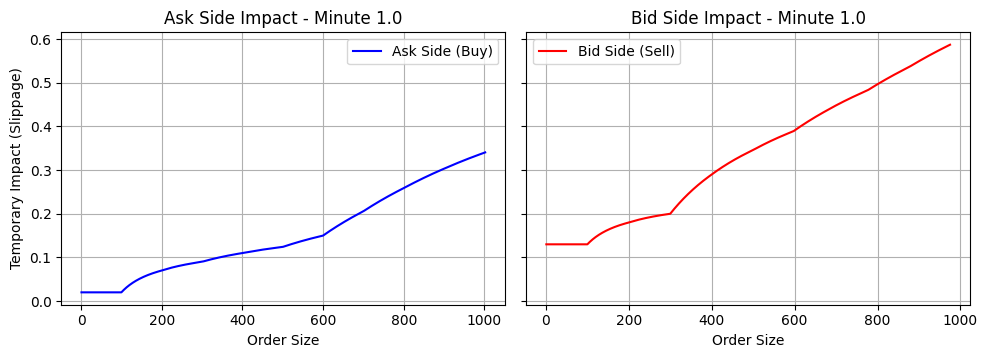

Minute 2.0 - Sell Side: [(100.0, 53.79), (100.0, 53.97), (100.0, 54.0), (100.0, 54.25), (100.0, 54.5), (100.0, 54.99), (100.0, 55.0), (100.0, 55.17), (100.0, 55.2), (100.0, 55.25)]
Minute 2.0 - Buy Side [(100.0, 43.0), (100.0, 42.99), (100.0, 42.9), (87.0, 42.74), (90.0, 42.73), (100.0, 42.72), (87.0, 42.71), (100.0, 42.5), (100.0, 42.25), (87.0, 42.15)]


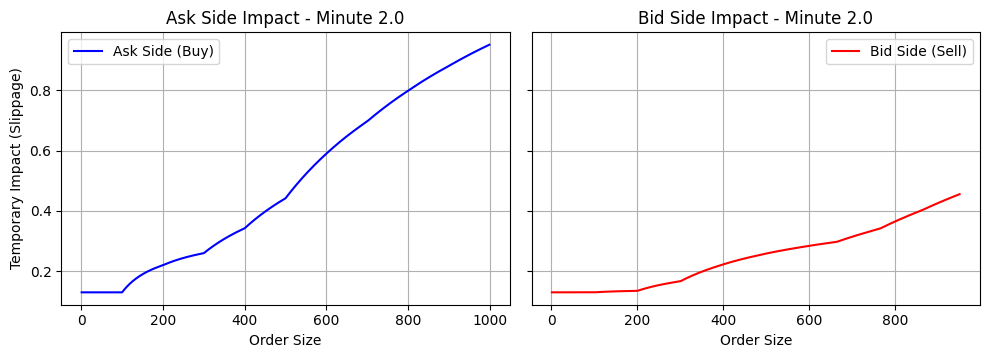

Minute 3.0 - Sell Side: [(100.0, 54.25), (100.0, 54.5), (100.0, 54.99), (100.0, 55.0), (100.0, 55.17), (100.0, 55.2), (100.0, 55.25), (100.0, 55.3), (100.0, 55.35), (100.0, 55.4)]
Minute 3.0 - Buy Side [(100.0, 54.0), (100.0, 53.98), (100.0, 53.96), (100.0, 53.8), (95.0, 53.78), (85.0, 53.61), (100.0, 53.59), (100.0, 53.5), (100.0, 53.47), (100.0, 53.46)]


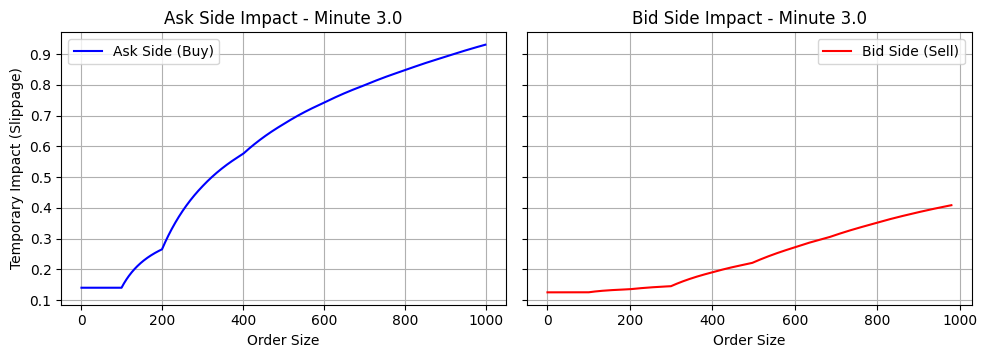

Minute 4.0 - Sell Side: [(100.0, 40.6), (100.0, 40.68), (100.0, 40.69), (100.0, 40.88), (100.0, 40.89), (100.0, 40.9), (100.0, 41.0), (85.0, 41.2), (100.0, 41.22), (100.0, 41.24)]
Minute 4.0 - Buy Side [(90.0, 40.35), (100.0, 40.25), (100.0, 40.21), (90.0, 40.2), (44.0, 40.15), (85.0, 40.1), (85.0, 40.09), (100.0, 40.03), (51.0, 40.02), (100.0, 40.01)]


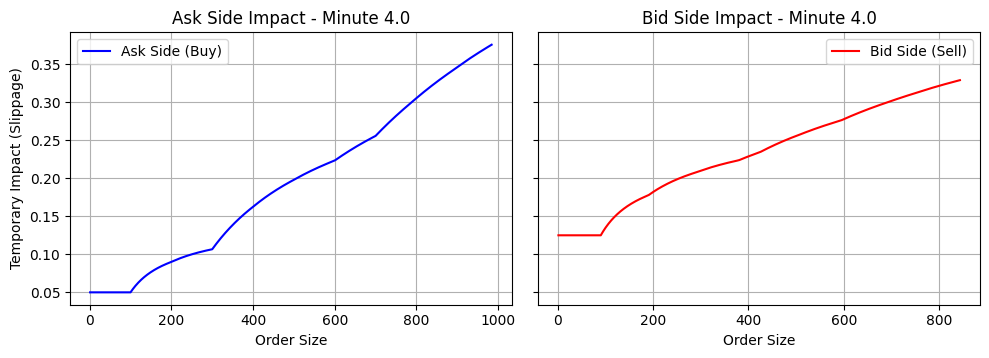

Minute 5.0 - Sell Side: [(100.0, 46.33), (100.0, 46.34), (100.0, 46.36), (90.0, 46.45), (90.0, 46.46), (95.0, 46.5), (100.0, 46.52), (85.0, 46.55), (85.0, 46.58), (60.0, 46.59)]
Minute 5.0 - Buy Side [(100.0, 46.66), (100.0, 46.65), (99.0, 46.61), (60.0, 46.6), (59.0, 46.55), (55.0, 46.5), (100.0, 46.45), (100.0, 46.23), (71.0, 46.22), (100.0, 46.1)]


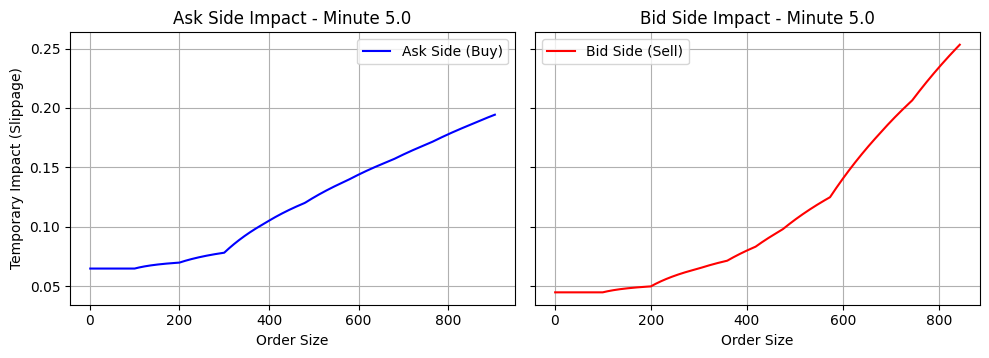

Minute 6.0 - Sell Side: [(100.0, 40.4), (100.0, 40.43), (100.0, 40.48), (95.0, 40.5), (100.0, 40.6), (60.0, 40.63), (80.0, 40.7), (97.0, 40.84), (100.0, 40.92), (100.0, 40.97)]
Minute 6.0 - Buy Side [(100.0, 46.56), (100.0, 46.48), (100.0, 46.47), (85.0, 46.35), (59.0, 46.23), (85.0, 46.22), (85.0, 46.2), (100.0, 46.11), (100.0, 46.1), (81.0, 46.09)]


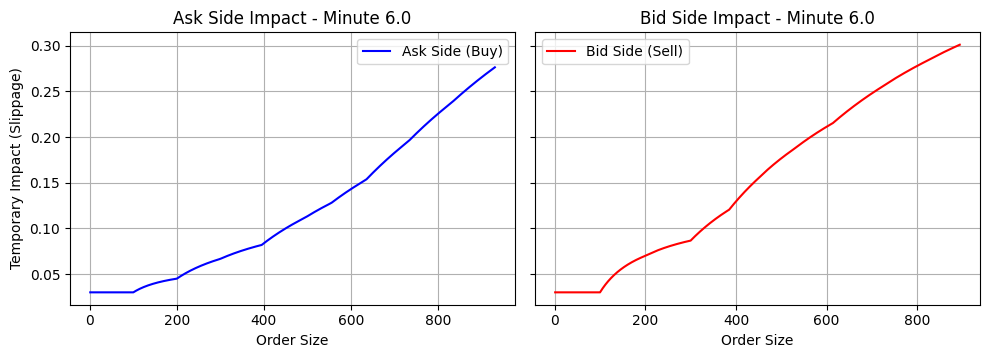

Minute 7.0 - Sell Side: [(100.0, 46.06), (90.0, 46.07), (100.0, 46.08), (68.0, 46.11), (99.0, 46.12), (100.0, 46.13), (75.0, 46.17), (80.0, 46.18), (51.0, 46.25), (100.0, 46.26)]
Minute 7.0 - Buy Side [(100.0, 36.14), (100.0, 36.08), (78.0, 36.05), (63.0, 36.02), (63.0, 36.0), (85.0, 35.95), (71.0, 35.94), (52.0, 35.9), (62.0, 35.88), (60.0, 35.86)]


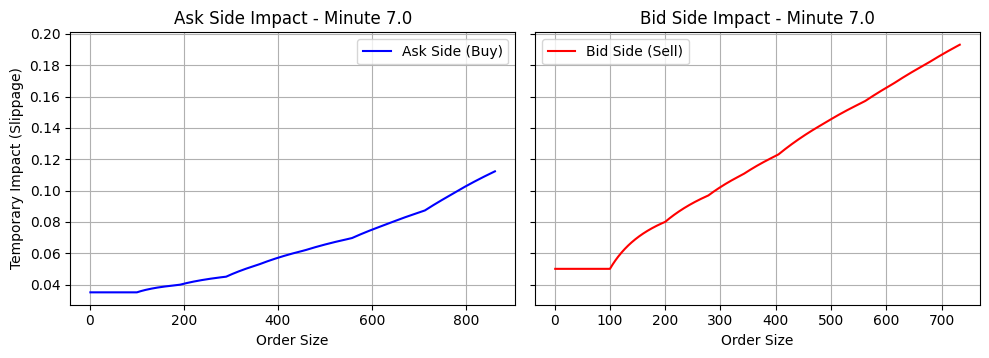

Minute 8.0 - Sell Side: [(100.0, 39.96), (94.0, 39.97), (90.0, 39.98), (100.0, 39.99), (100.0, 40.0), (100.0, 40.09), (100.0, 40.1), (100.0, 40.13), (50.0, 40.15), (50.0, 40.16)]
Minute 8.0 - Buy Side [(84.0, 52.41), (45.0, 52.35), (55.0, 52.3), (64.0, 52.28), (77.0, 52.25), (85.0, 52.24), (70.0, 52.22), (70.0, 52.2), (50.0, 52.12), (100.0, 52.11)]


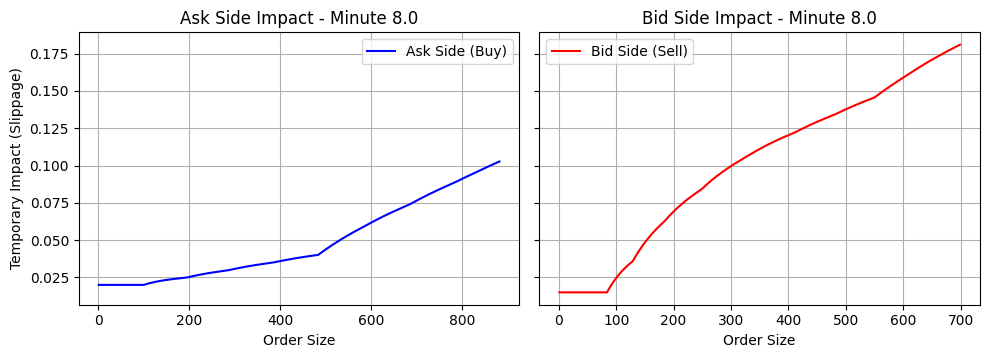

Minute 9.0 - Sell Side: [(100.0, 52.4), (100.0, 52.43), (100.0, 52.49), (100.0, 52.75), (100.0, 52.78), (100.0, 53.0), (100.0, 53.21), (100.0, 53.3), (100.0, 53.4), (100.0, 53.43)]
Minute 9.0 - Buy Side [(91.0, 37.22), (60.0, 37.12), (60.0, 37.1), (62.0, 37.06), (68.0, 37.05), (89.0, 37.03), (74.0, 37.02), (55.0, 37.01), (80.0, 37.0), (72.0, 36.99)]


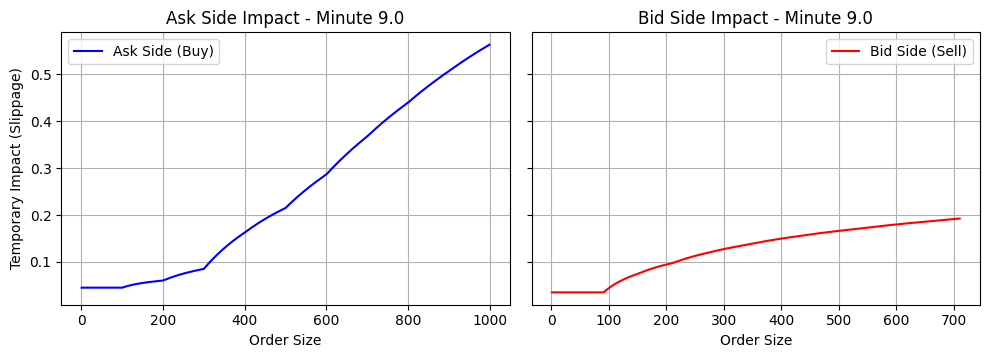

In [24]:
plot_temporary_impact(crwv_df)

Minute 0.0 - Sell Side: [(100.0, 31.82), (100.0, 31.88), (108.0, 31.89), (110.0, 31.94), (104.0, 32.21), (100.0, 32.31), (100.0, 32.48), (100.0, 32.5), (100.0, 32.51), (100.0, 32.52)]
Minute 0.0 - Buy Side [(100.0, 27.34), (101.0, 27.2), (100.0, 27.0), (105.0, 26.95), (102.0, 26.83), (100.0, 26.79), (100.0, 26.74), (100.0, 26.59), (100.0, 26.5), (100.0, 26.48)]


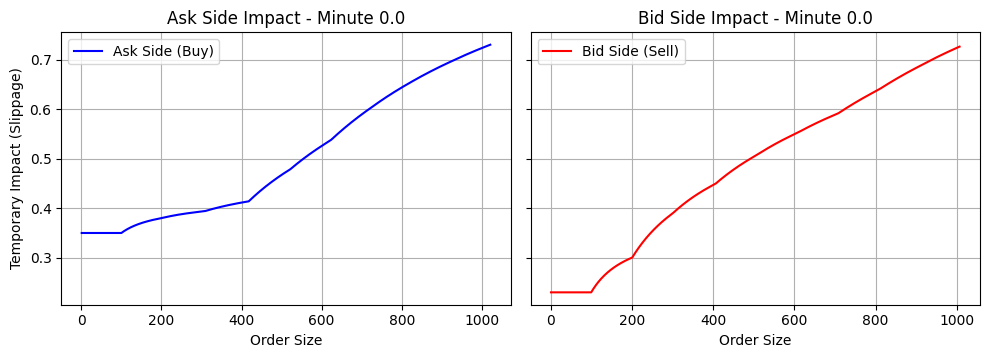

Minute 1.0 - Sell Side: [(200.0, 32.39), (200.0, 32.49), (200.0, 32.5), (200.0, 32.58), (200.0, 32.62), (200.0, 32.64), (200.0, 32.77), (130.0, 32.88), (130.0, 32.9), (130.0, 32.93)]
Minute 1.0 - Buy Side [(100.0, 30.1), (100.0, 30.05), (101.0, 29.8), (200.0, 29.72), (200.0, 29.6), (200.0, 29.5), (200.0, 29.36), (200.0, 28.9), (200.0, 28.89), (120.0, 28.82)]


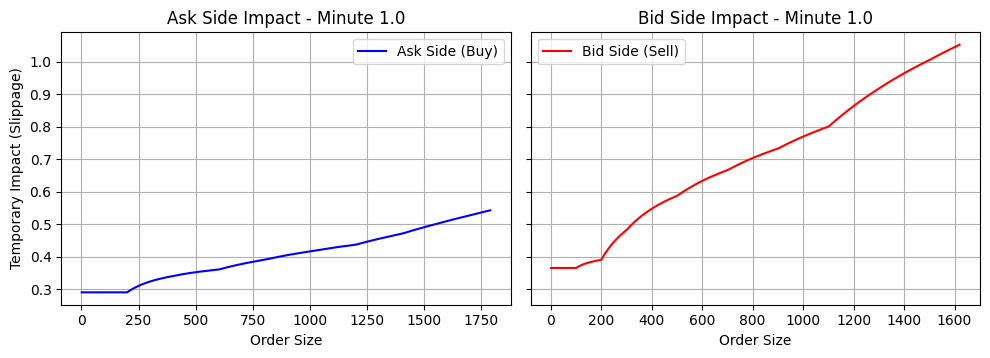

Minute 2.0 - Sell Side: [(170.0, 34.65), (105.0, 34.76), (190.0, 34.88), (200.0, 34.99), (200.0, 35.0), (200.0, 35.07), (200.0, 35.25), (200.0, 35.29), (166.0, 35.3), (100.0, 35.4)]
Minute 2.0 - Buy Side [(50.0, 29.61), (200.0, 29.6), (200.0, 29.54), (200.0, 29.53), (150.0, 29.42), (200.0, 29.39), (200.0, 29.31), (200.0, 29.28), (100.0, 29.15), (100.0, 29.05)]


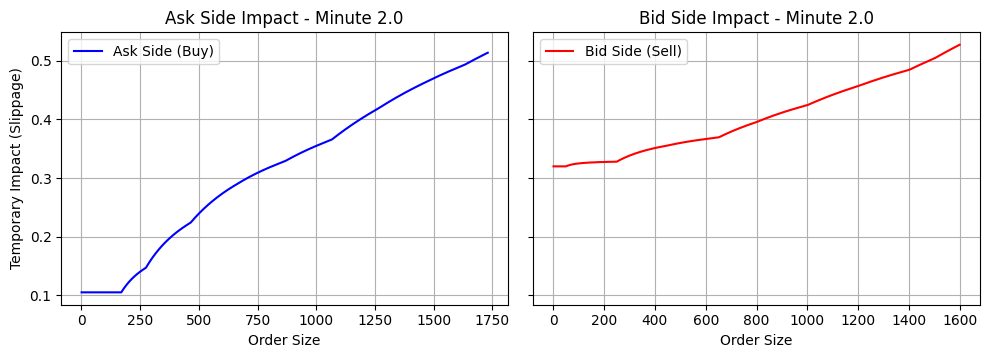

Minute 3.0 - Sell Side: [(100.0, 28.39), (100.5, 28.5), (105.0, 28.68), (105.0, 28.82), (142.0, 28.87), (100.0, 28.95), (101.0, 28.96), (100.0, 28.99), (100.0, 29.02), (100.0, 29.24)]
Minute 3.0 - Buy Side [(100.0, 27.89), (112.5, 27.88), (101.0, 27.85), (200.0, 27.79), (200.0, 27.75), (200.0, 27.64), (116.0, 27.63), (100.0, 27.62), (100.0, 27.61), (125.0, 27.54)]


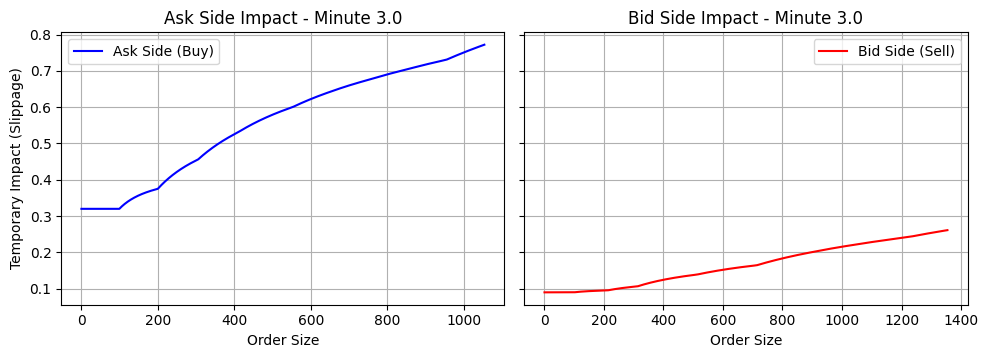

Minute 4.0 - Sell Side: [(100.0, 28.02), (100.0, 28.04), (100.0, 28.15), (199.0, 28.25), (200.0, 28.32), (117.0, 28.37), (107.0, 28.38), (107.0, 28.39), (100.0, 28.43), (100.0, 28.5)]
Minute 4.0 - Buy Side [(100.0, 29.06), (100.0, 29.04), (200.0, 29.01), (200.0, 28.85), (200.0, 28.76), (200.0, 28.66), (101.0, 28.52), (200.0, 28.5), (125.0, 28.42), (105.0, 28.4)]


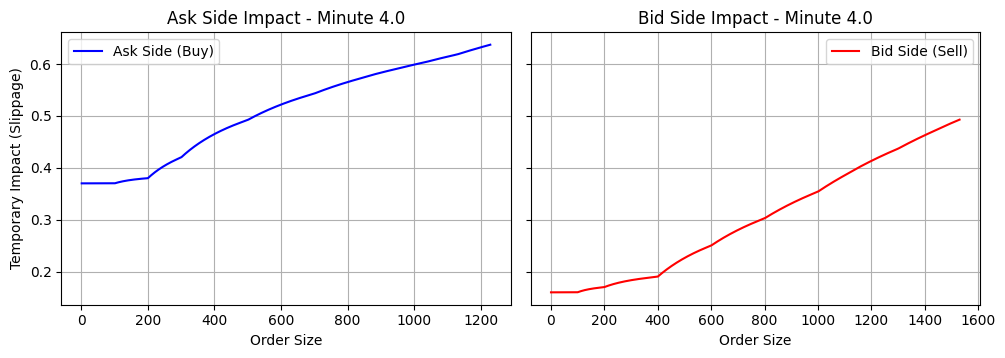

Minute 5.0 - Sell Side: [(100.0, 32.04), (128.0, 32.05), (200.0, 32.07), (200.0, 32.35), (200.0, 32.5), (200.0, 32.58), (200.0, 32.7), (200.0, 32.79), (150.0, 32.84), (100.0, 32.99)]
Minute 5.0 - Buy Side [(95.0, 33.27), (100.0, 32.77), (200.0, 32.75), (200.0, 32.65), (158.0, 32.45), (200.0, 32.39), (200.0, 32.36), (101.0, 32.32), (100.0, 32.23), (100.0, 32.13)]


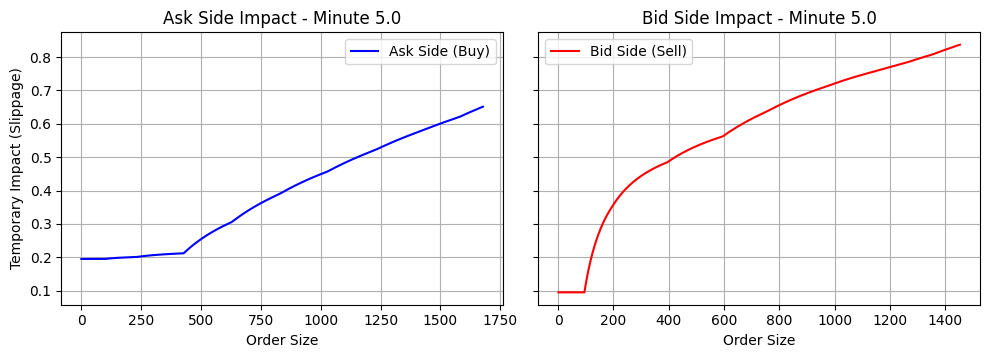

Minute 6.0 - Sell Side: [(100.0, 32.43), (200.0, 32.52), (200.0, 32.64), (200.0, 32.82), (200.0, 32.87), (200.0, 32.88), (200.0, 32.93), (200.0, 32.97), (164.0, 32.99), (130.0, 33.09)]
Minute 6.0 - Buy Side [(100.0, 30.04), (100.0, 30.02), (200.0, 29.9), (100.0, 29.7), (105.0, 29.64), (150.0, 29.62), (100.0, 29.55), (105.0, 29.5), (100.0, 29.49), (100.0, 29.48)]


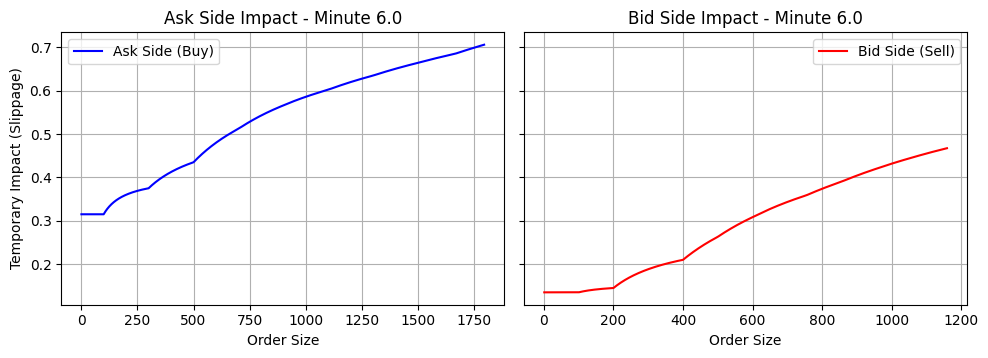

Minute 7.0 - Sell Side: [(103.0, 30.83), (200.0, 30.88), (198.0, 30.98), (200.0, 31.0), (200.0, 31.13), (200.0, 31.26), (126.0, 31.38), (100.0, 31.45), (100.0, 31.5), (100.0, 31.51)]
Minute 7.0 - Buy Side [(100.0, 31.1), (200.0, 31.08), (200.0, 31.01), (200.0, 31.0), (200.0, 30.99), (200.0, 30.97), (200.0, 30.88), (105.0, 30.83), (100.0, 30.78), (100.0, 30.68)]


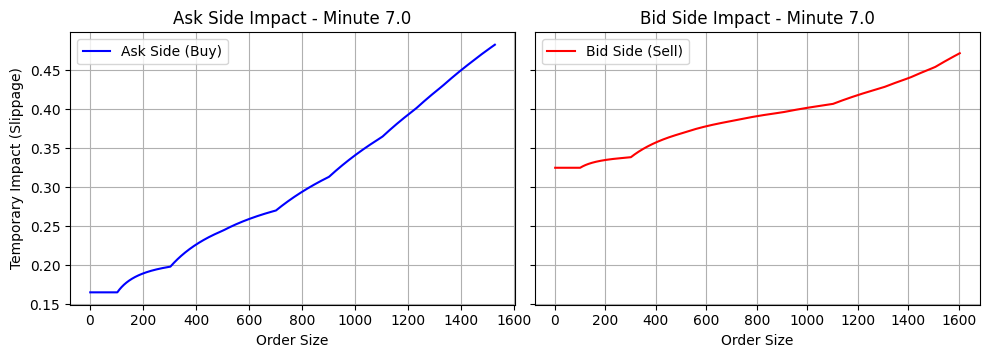

Minute 8.0 - Sell Side: [(102.0, 32.34), (200.0, 32.35), (100.0, 32.39), (200.0, 32.44), (200.0, 32.5), (200.0, 32.85), (100.5, 32.86), (102.0, 32.9), (100.0, 32.99), (100.0, 33.0)]
Minute 8.0 - Buy Side [(100.0, 28.29), (100.0, 28.18), (200.0, 28.17), (102.0, 28.11), (101.0, 28.03), (105.0, 27.94), (110.0, 27.82), (200.0, 27.76), (100.0, 27.68), (100.0, 27.51)]


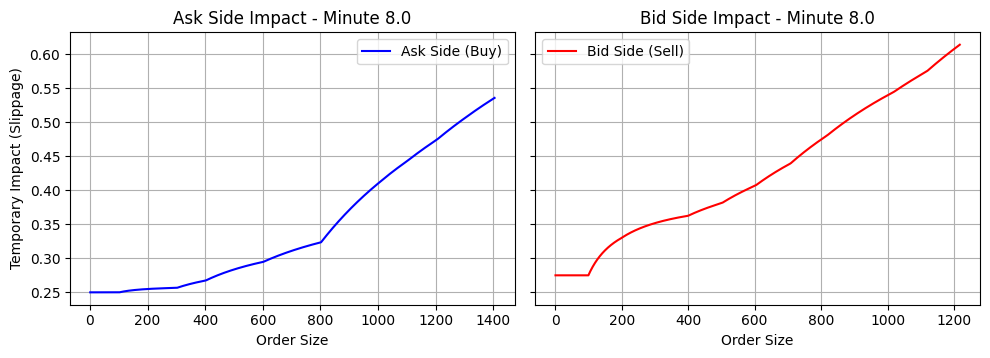

Minute 9.0 - Sell Side: [(100.0, 28.84), (102.0, 28.85), (100.0, 28.97), (100.0, 29.0), (102.0, 29.01), (200.0, 29.1), (101.0, 29.31), (100.0, 29.32), (100.0, 29.5), (100.0, 29.57)]
Minute 9.0 - Buy Side [(100.0, 28.33), (100.0, 28.32), (100.0, 28.17), (101.0, 28.11), (102.0, 28.03), (100.0, 27.94), (100.0, 27.87), (100.0, 27.82), (100.0, 27.76), (100.0, 27.72)]


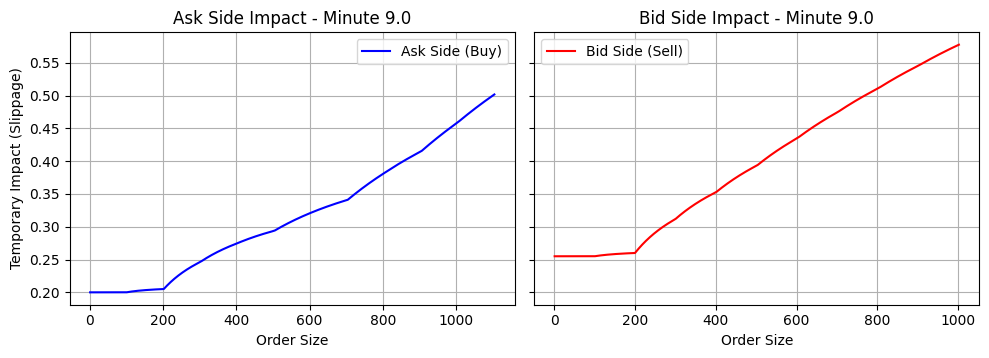

In [25]:
plot_temporary_impact(frog_df)

Minute 0.0 - Sell Side: [(366.0, 9.34), (1345.0, 9.35), (2300.0, 9.36), (2325.0, 9.37), (2300.0, 9.38), (2200.0, 9.39), (1100.0, 9.4), (631.0, 9.41), (358.0, 9.42), (400.0, 9.43)]
Minute 0.0 - Buy Side [(510.0, 7.18), (1468.0, 7.16), (2350.0, 7.15), (2446.0, 7.14), (2327.0, 7.13), (2321.0, 7.12), (1744.0, 7.11), (725.0, 7.1), (565.0, 7.09), (520.0, 7.08)]


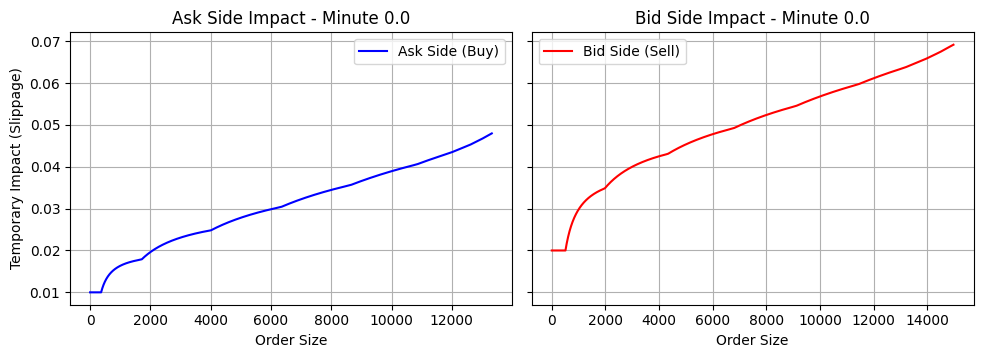

Minute 1.0 - Sell Side: [(350.0, 8.16), (2300.0, 8.17), (2919.0, 8.18), (3000.0, 8.19), (2950.0, 8.2), (2881.0, 8.21), (2500.0, 8.22), (627.0, 8.23), (324.0, 8.24), (288.0, 8.25)]
Minute 1.0 - Buy Side [(368.0, 7.69), (2320.0, 7.68), (2950.0, 7.67), (2950.0, 7.66), (2929.0, 7.65), (2850.0, 7.64), (2699.0, 7.63), (1032.0, 7.62), (450.0, 7.61), (386.0, 7.6)]


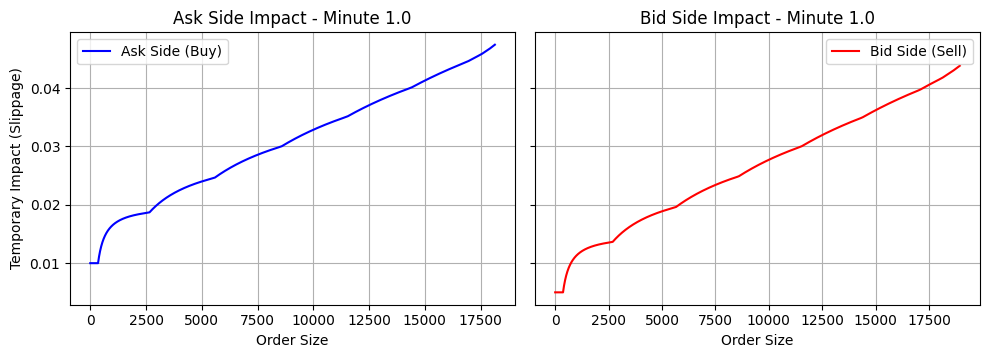

Minute 2.0 - Sell Side: [(400.0, 8.17), (2375.0, 8.18), (2900.0, 8.19), (2954.0, 8.2), (3050.0, 8.21), (3057.0, 8.22), (2870.0, 8.23), (988.0, 8.24), (404.0, 8.25), (325.0, 8.26)]
Minute 2.0 - Buy Side [(400.0, 8.13), (2309.0, 8.12), (2937.0, 8.11), (2870.0, 8.1), (2850.0, 8.09), (2850.0, 8.08), (2509.0, 8.07), (500.0, 8.06), (336.0, 8.05), (321.0, 8.04)]


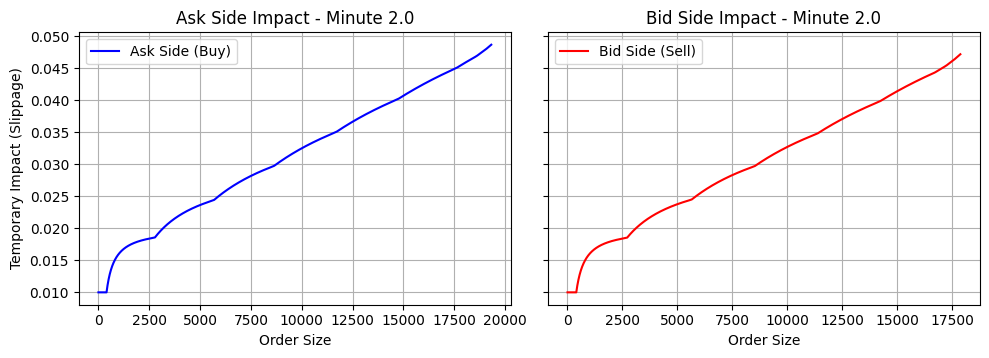

Minute 3.0 - Sell Side: [(400.0, 9.71), (2451.0, 9.72), (2920.0, 9.73), (2900.0, 9.74), (2948.0, 9.75), (2979.0, 9.76), (2815.0, 9.77), (550.0, 9.78), (341.0, 9.79), (340.0, 9.8)]
Minute 3.0 - Buy Side [(393.0, 6.82), (2435.0, 6.8), (2920.0, 6.79), (2824.0, 6.78), (2768.0, 6.77), (2750.0, 6.76), (2550.0, 6.75), (650.0, 6.74), (455.0, 6.73), (496.0, 6.72)]


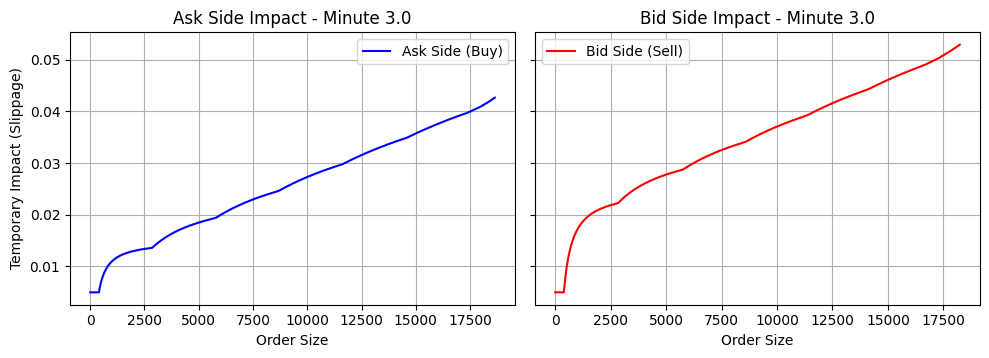

Minute 4.0 - Sell Side: [(464.0, 7.75), (2409.0, 7.76), (2944.0, 7.77), (2911.0, 7.78), (2900.0, 7.79), (2862.0, 7.8), (2604.0, 7.81), (615.0, 7.82), (450.0, 7.83), (414.0, 7.84)]
Minute 4.0 - Buy Side [(400.0, 8.17), (2500.0, 8.16), (3000.0, 8.15), (2950.0, 8.14), (3002.0, 8.13), (3004.0, 8.12), (2769.0, 8.11), (649.0, 8.1), (356.0, 8.09), (300.0, 8.08)]


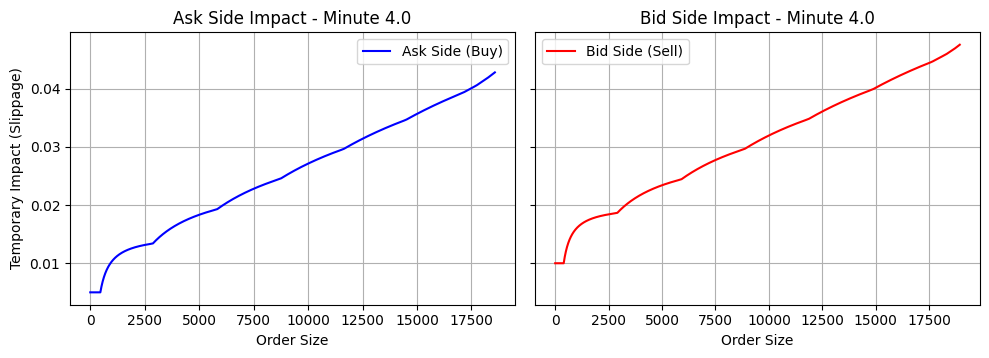

Minute 5.0 - Sell Side: [(458.0, 8.79), (2600.0, 8.8), (3000.0, 8.81), (3000.0, 8.82), (2960.0, 8.83), (3005.0, 8.84), (2700.0, 8.85), (553.0, 8.86), (400.0, 8.87), (400.0, 8.88)]
Minute 5.0 - Buy Side [(500.0, 8.13), (2728.0, 8.12), (3100.0, 8.11), (3020.0, 8.1), (2960.0, 8.09), (2975.0, 8.08), (2698.0, 8.07), (700.0, 8.06), (457.0, 8.05), (457.0, 8.04)]


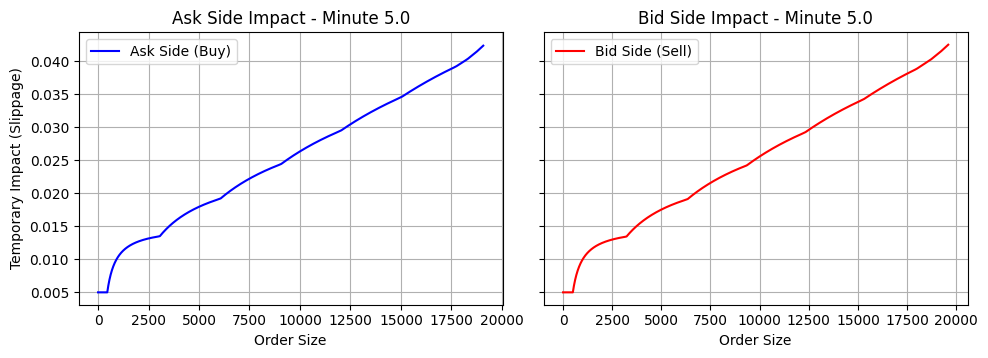

Minute 6.0 - Sell Side: [(515.0, 9.45), (2579.0, 9.46), (2926.0, 9.47), (3013.0, 9.48), (3100.0, 9.49), (3002.0, 9.5), (2812.0, 9.51), (629.0, 9.52), (463.0, 9.53), (463.0, 9.54)]
Minute 6.0 - Buy Side [(500.0, 9.56), (2795.0, 9.55), (3066.0, 9.54), (3055.0, 9.53), (3050.0, 9.52), (3003.0, 9.51), (2645.0, 9.5), (611.0, 9.49), (550.0, 9.48), (550.0, 9.47)]


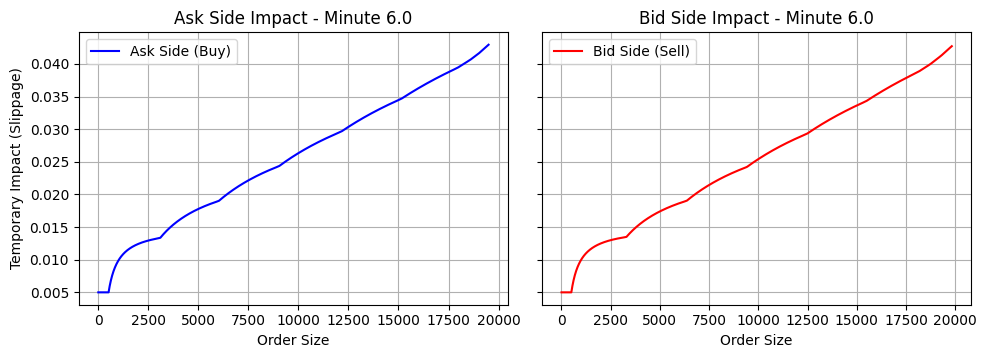

Minute 7.0 - Sell Side: [(473.5, 8.05), (2504.0, 8.06), (3000.0, 8.07), (3012.0, 8.08), (3100.0, 8.09), (3100.0, 8.1), (2711.0, 8.11), (654.0, 8.12), (367.0, 8.13), (313.0, 8.14)]
Minute 7.0 - Buy Side [(500.0, 8.7), (2810.0, 8.69), (3020.0, 8.68), (3012.0, 8.67), (3068.0, 8.66), (3042.0, 8.65), (2725.0, 8.64), (770.0, 8.63), (545.0, 8.62), (504.0, 8.61)]


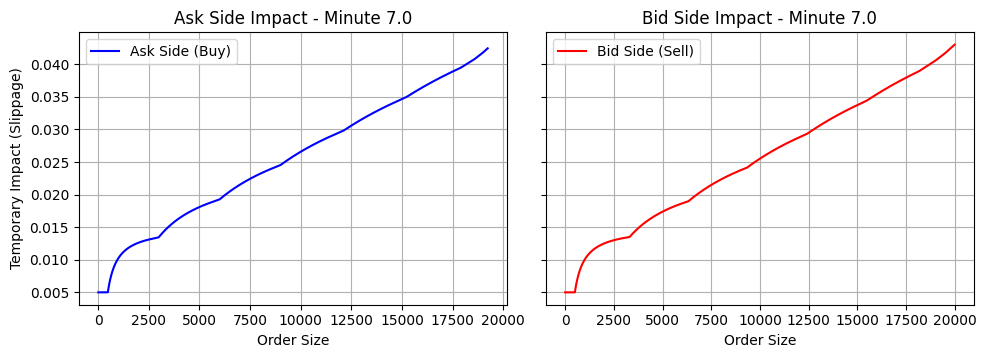

Minute 8.0 - Sell Side: [(414.0, 7.76), (2507.0, 7.77), (3001.0, 7.78), (3048.0, 7.79), (2999.0, 7.8), (2921.0, 7.81), (2633.0, 7.82), (600.0, 7.83), (400.0, 7.84), (355.0, 7.85)]
Minute 8.0 - Buy Side [(538.0, 8.97), (2700.0, 8.96), (3000.0, 8.95), (3107.0, 8.94), (3200.0, 8.93), (3181.0, 8.92), (2915.0, 8.91), (979.0, 8.9), (700.0, 8.89), (600.0, 8.88)]


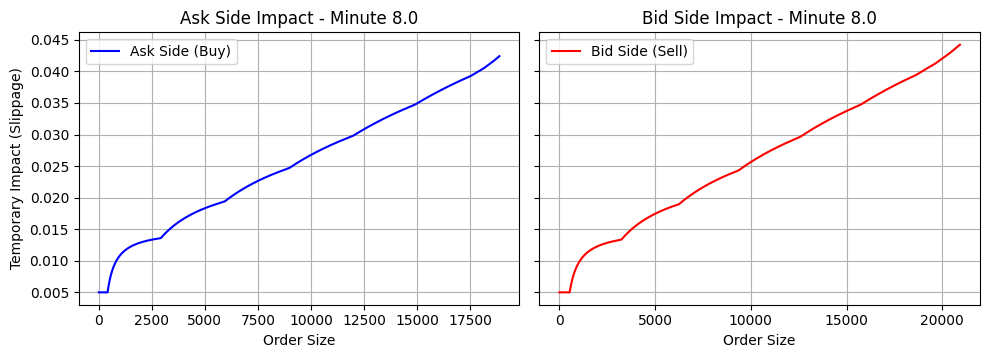

Minute 9.0 - Sell Side: [(526.0, 8.67), (2702.0, 8.68), (3100.0, 8.69), (3004.0, 8.7), (3036.0, 8.71), (3100.0, 8.72), (2921.0, 8.73), (700.0, 8.74), (500.0, 8.75), (500.0, 8.76)]
Minute 9.0 - Buy Side [(565.0, 8.09), (2790.0, 8.08), (3005.0, 8.07), (3025.0, 8.06), (3152.0, 8.05), (3194.0, 8.04), (2950.0, 8.03), (1336.0, 8.02), (790.0, 8.01), (607.0, 8.0)]


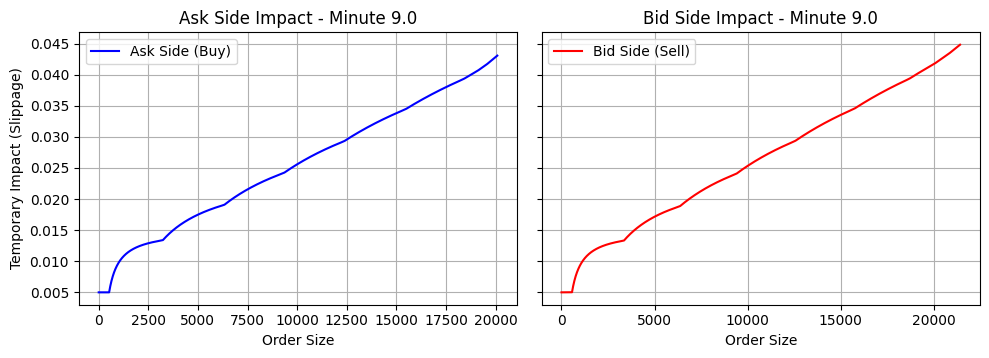

In [26]:
plot_temporary_impact(soun_df)

## Plotting temporary impact for the last 10 events for different tickets

Minute 380.0 - Sell Side: [(100.0, 39.05), (100.0, 39.06), (100.0, 39.1), (100.0, 39.11), (100.0, 39.12), (100.0, 39.13), (100.0, 39.14), (100.0, 39.18), (100.0, 39.19), (100.0, 39.26)]
Minute 380.0 - Buy Side [(73.0, 40.1), (72.0, 40.07), (84.0, 40.06), (100.0, 40.05), (100.0, 40.03), (100.0, 40.0), (100.0, 39.99), (100.0, 39.92), (100.0, 39.9), (100.0, 39.87)]


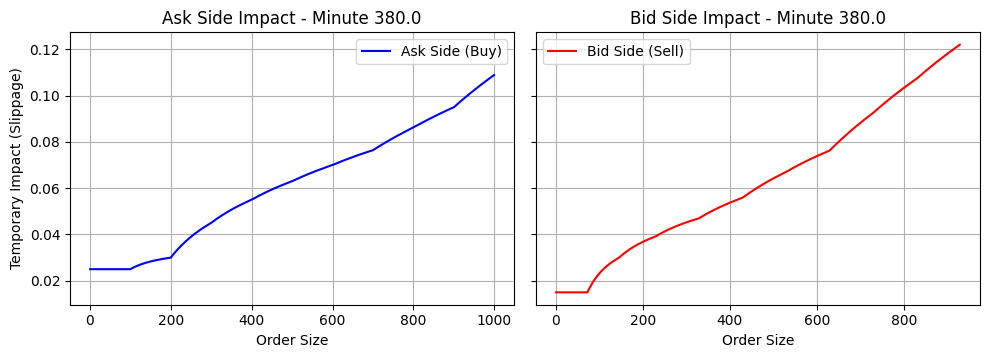

Minute 381.0 - Sell Side: [(100.0, 40.24), (100.0, 40.29), (100.0, 40.3), (100.0, 40.32), (100.0, 40.38), (100.0, 40.39), (100.0, 40.4), (100.0, 40.42), (100.0, 40.44), (100.0, 40.45)]
Minute 381.0 - Buy Side [(81.0, 51.01), (100.0, 51.0), (100.0, 50.98), (100.0, 50.97), (100.0, 50.94), (100.0, 50.93), (100.0, 50.92), (100.0, 50.91), (85.0, 50.9), (70.0, 50.88)]


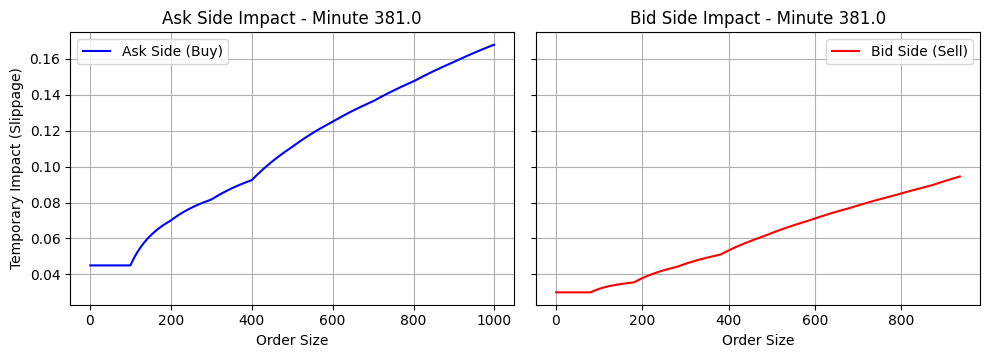

Minute 382.0 - Sell Side: [(100.0, 49.7), (100.0, 49.71), (100.0, 49.72), (100.0, 49.83), (100.0, 49.84), (100.0, 49.88), (100.0, 49.89), (100.0, 50.0), (100.0, 50.05), (100.0, 50.1)]
Minute 382.0 - Buy Side [(82.0, 41.97), (100.0, 41.96), (100.0, 41.94), (100.0, 41.93), (100.0, 41.92), (100.0, 41.91), (100.0, 41.89), (100.0, 41.87), (86.0, 41.86), (75.0, 41.82)]


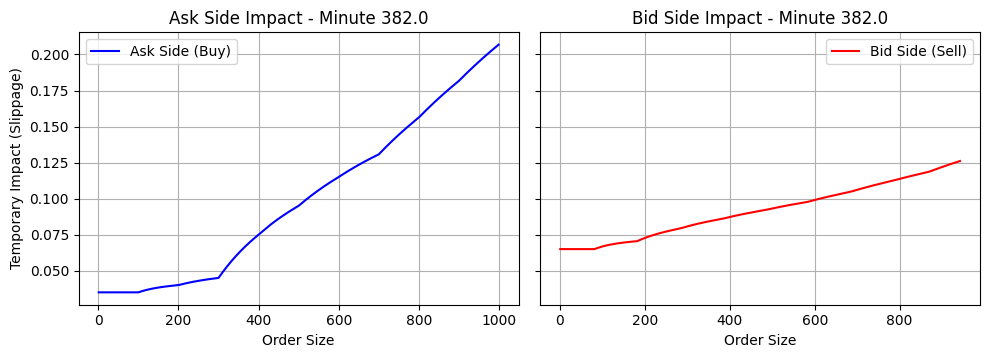

Minute 383.0 - Sell Side: [(100.0, 41.66), (100.0, 41.72), (100.0, 41.73), (100.0, 41.75), (100.0, 41.76), (100.0, 41.77), (100.0, 41.8), (100.0, 41.85), (100.0, 41.87), (100.0, 41.89)]
Minute 383.0 - Buy Side [(100.0, 44.39), (100.0, 44.37), (100.0, 44.35), (100.0, 44.32), (100.0, 44.31), (100.0, 44.3), (100.0, 44.29), (100.0, 44.28), (100.0, 44.27), (100.0, 44.26)]


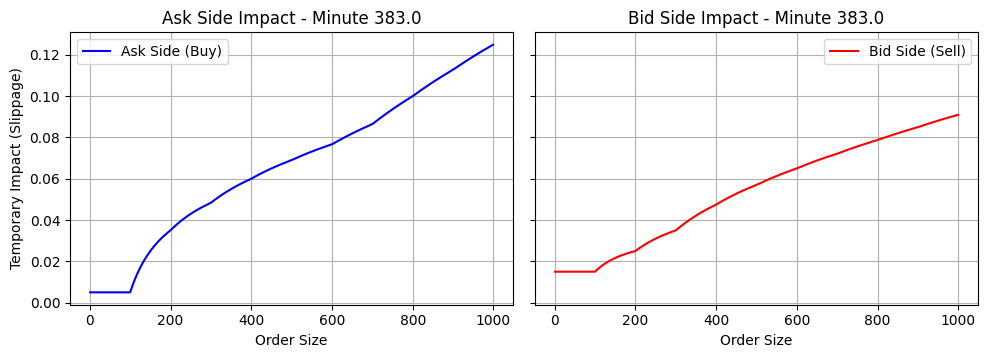

Minute 384.0 - Sell Side: [(100.0, 41.92), (100.0, 41.93), (100.0, 41.94), (100.0, 41.97), (100.0, 41.98), (100.0, 41.99), (100.0, 42.0), (100.0, 42.03), (100.0, 42.06), (100.0, 42.07)]
Minute 384.0 - Buy Side [(73.0, 43.65), (93.0, 43.59), (90.0, 43.5), (100.0, 43.49), (86.0, 43.48), (100.0, 43.45), (99.0, 43.41), (100.0, 43.33), (100.0, 43.3), (100.0, 43.29)]


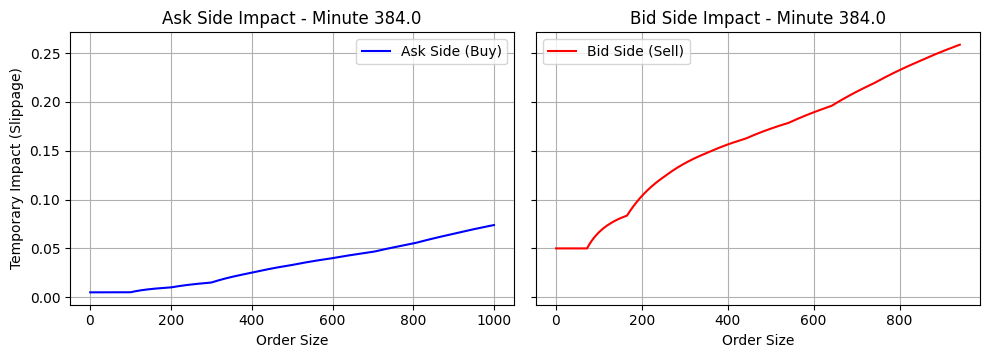

Minute 385.0 - Sell Side: [(100.0, 43.2), (100.0, 43.21), (100.0, 43.3), (100.0, 43.31), (100.0, 43.37), (100.0, 43.47), (100.0, 43.49), (100.0, 43.5), (100.0, 43.54), (100.0, 43.55)]
Minute 385.0 - Buy Side [(100.0, 41.17), (100.0, 41.16), (100.0, 41.12), (100.0, 41.08), (100.0, 41.03), (100.0, 41.0), (100.0, 40.99), (100.0, 40.98), (100.0, 40.95), (100.0, 40.86)]


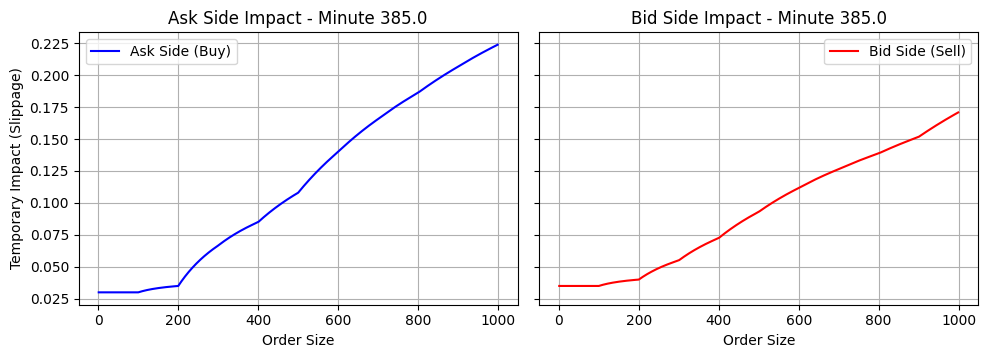

Minute 386.0 - Sell Side: [(100.0, 43.34), (110.0, 43.36), (115.0, 43.37), (110.0, 43.4), (100.0, 43.46), (100.0, 43.49), (100.0, 43.5), (100.0, 43.51), (100.0, 43.57), (100.0, 43.58)]
Minute 386.0 - Buy Side [(102.0, 53.11), (105.0, 53.1), (114.0, 53.06), (100.0, 53.05), (100.0, 53.04), (100.0, 53.03), (100.0, 53.01), (100.0, 53.0), (100.0, 52.99), (100.0, 52.98)]


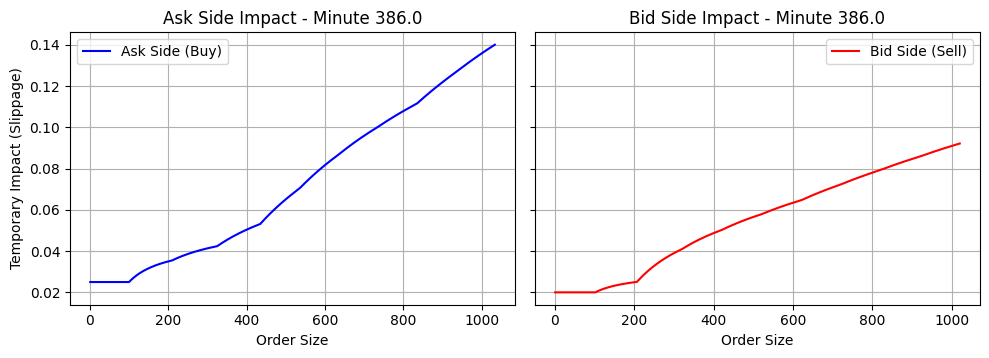

Minute 387.0 - Sell Side: [(100.0, 49.99), (105.0, 50.0), (100.0, 50.05), (100.0, 50.15), (115.0, 50.16), (115.0, 50.24), (100.0, 50.43), (102.0, 50.5), (100.0, 50.6), (100.0, 50.8)]
Minute 387.0 - Buy Side [(100.0, 41.88), (100.0, 41.87), (100.0, 41.86), (100.0, 41.85), (100.0, 41.84), (100.0, 41.83), (100.0, 41.78), (100.0, 41.77), (100.0, 41.75), (100.0, 41.74)]


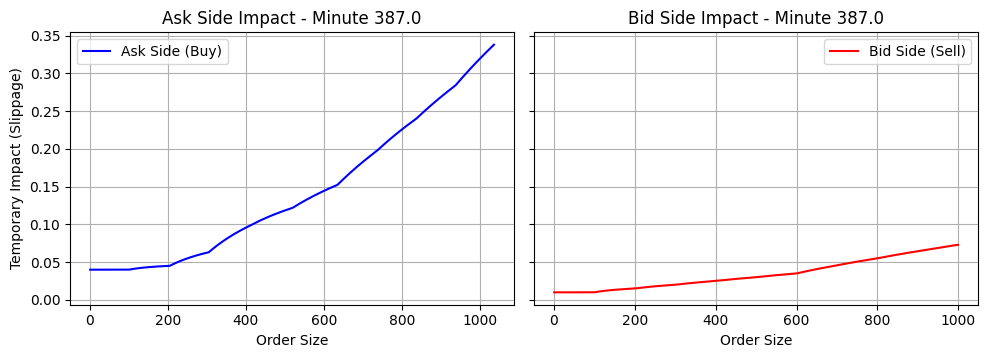

Minute 388.0 - Sell Side: [(153.0, 47.5), (130.0, 47.51), (158.0, 47.55), (200.0, 47.56), (200.0, 47.59), (152.0, 47.6), (100.0, 47.61), (100.0, 47.65), (100.0, 47.66), (100.0, 47.67)]
Minute 388.0 - Buy Side [(134.0, 40.57), (115.0, 40.56), (105.0, 40.53), (100.0, 40.51), (100.0, 40.5), (100.0, 40.49), (100.0, 40.48), (100.0, 40.47), (100.0, 40.46), (100.0, 40.45)]


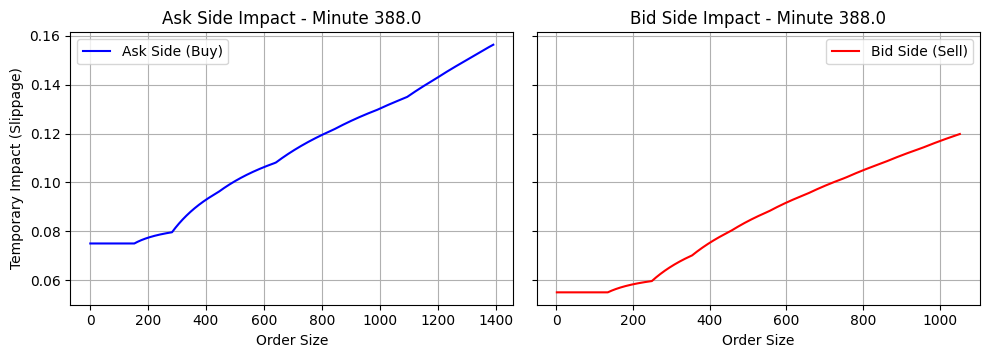

Minute 389.0 - Sell Side: [(200.0, 41.89), (200.0, 41.9), (200.0, 41.91), (200.0, 41.92), (152.0, 41.93), (127.0, 41.94), (144.0, 41.95), (158.0, 41.96), (152.0, 41.97), (117.0, 41.98)]
Minute 389.0 - Buy Side [(242.0, 49.84), (208.0, 49.83), (154.0, 49.82), (120.0, 49.78), (128.0, 49.75), (101.0, 49.74), (100.0, 49.72), (105.0, 49.7), (100.0, 49.6), (100.0, 49.58)]


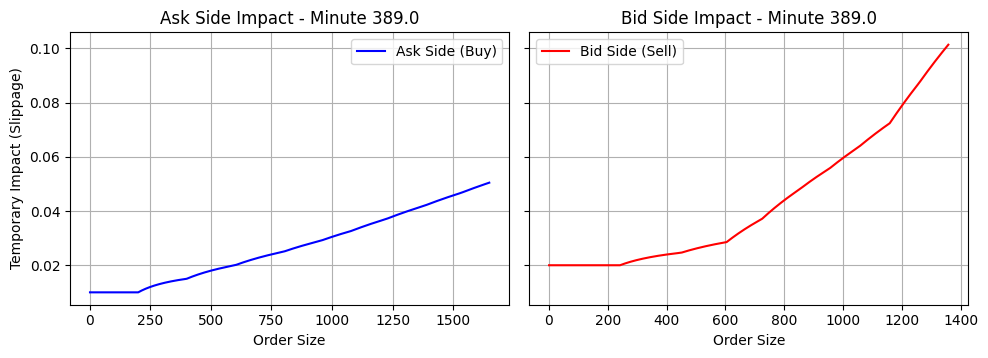

In [27]:
plot_temporary_impact(crwv_df, indices=range(380,390))

Minute 380.0 - Sell Side: [(100.0, 31.23), (101.0, 31.24), (107.0, 31.25), (110.0, 31.26), (110.0, 31.27), (110.0, 31.28), (110.0, 31.29), (100.0, 31.3), (100.0, 31.31), (100.0, 31.32)]
Minute 380.0 - Buy Side [(97.0, 33.53), (101.0, 33.52), (100.0, 33.51), (101.0, 33.5), (101.0, 33.49), (101.0, 33.48), (101.0, 33.47), (100.0, 33.46), (100.0, 33.45), (100.0, 33.44)]


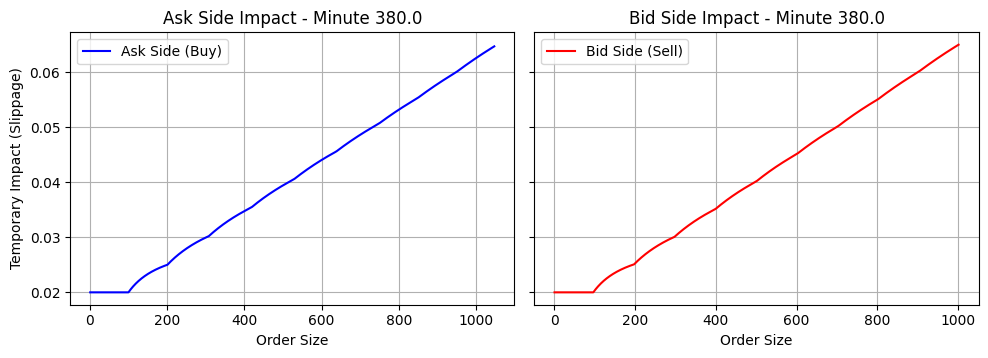

Minute 381.0 - Sell Side: [(100.0, 33.16), (100.0, 33.18), (100.0, 33.2), (100.0, 33.22), (103.5, 33.23), (101.0, 33.24), (101.0, 33.25), (100.0, 33.27), (100.0, 33.28), (100.0, 33.29)]
Minute 381.0 - Buy Side [(78.5, 33.75), (106.0, 33.73), (100.0, 33.72), (100.0, 33.66), (100.0, 33.54), (100.0, 33.53), (100.0, 33.49), (100.0, 33.45), (100.0, 33.12), (100.0, 33.1)]


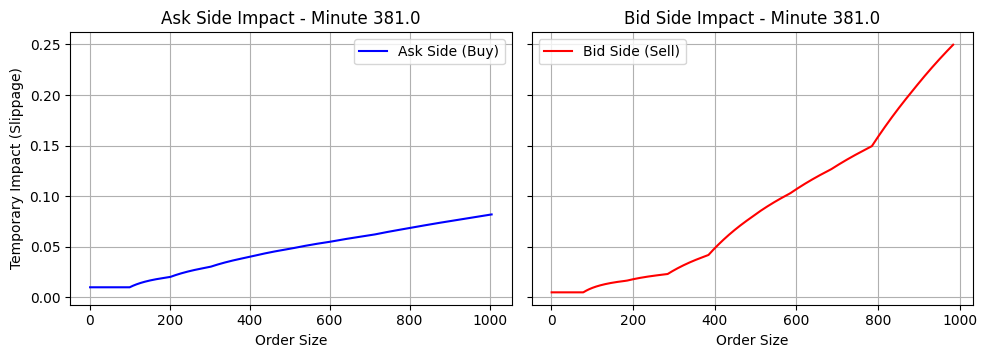

Minute 382.0 - Sell Side: [(100.0, 34.51), (100.0, 34.53), (100.0, 34.54), (100.0, 34.56), (100.0, 34.57), (100.0, 34.6), (100.0, 34.64), (100.0, 34.65), (100.0, 34.68), (100.0, 34.69)]
Minute 382.0 - Buy Side [(87.0, 28.46), (100.0, 28.45), (100.0, 28.44), (100.0, 28.43), (100.0, 28.42), (100.0, 28.41), (100.0, 28.39), (100.0, 28.38), (100.0, 28.37), (100.0, 28.36)]


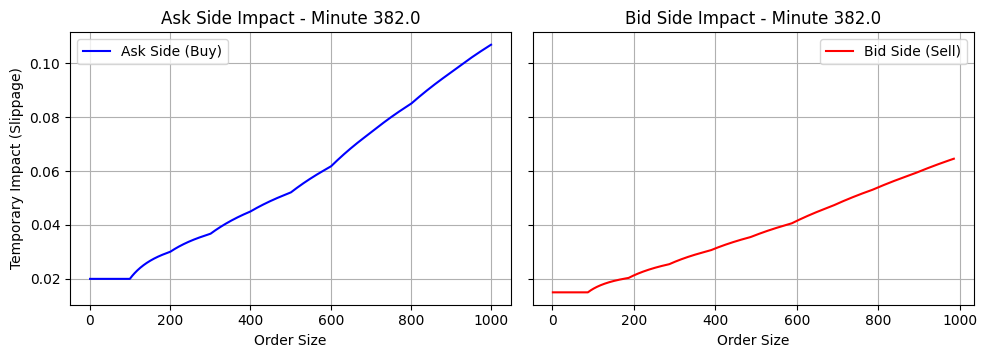

Minute 383.0 - Sell Side: [(100.0, 28.47), (100.0, 28.48), (100.0, 28.49), (101.0, 28.5), (101.0, 28.51), (103.0, 28.52), (101.0, 28.54), (100.0, 28.56), (100.0, 28.57), (100.0, 28.58)]
Minute 383.0 - Buy Side [(100.0, 31.79), (100.0, 31.78), (100.0, 31.77), (100.0, 31.75), (100.0, 31.61), (100.0, 31.35), (100.0, 31.21), (100.0, 31.08), (100.0, 31.05), (100.0, 31.03)]


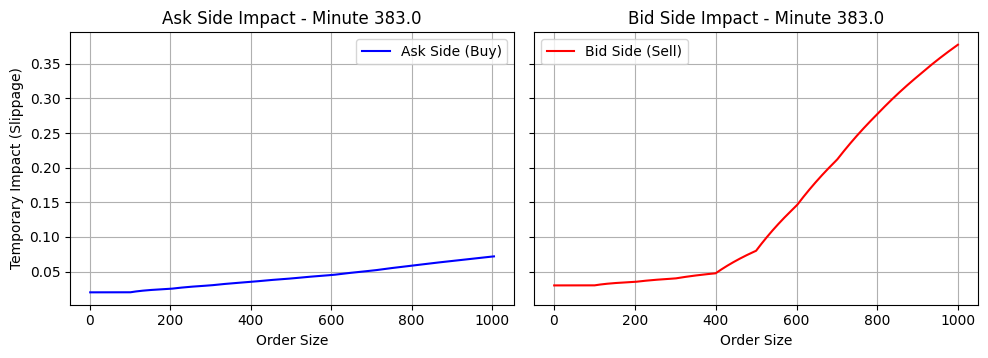

Minute 384.0 - Sell Side: [(99.0, 32.02), (100.0, 32.03), (100.0, 32.04), (100.0, 32.05), (110.0, 32.06), (100.0, 32.11), (100.0, 32.12), (100.0, 32.23), (100.0, 32.24), (100.0, 32.3)]
Minute 384.0 - Buy Side [(93.0, 32.07), (100.0, 32.06), (108.5, 32.02), (108.0, 32.01), (108.0, 32.0), (104.0, 31.95), (100.0, 31.73), (100.0, 31.49), (100.0, 31.43), (100.0, 31.37)]


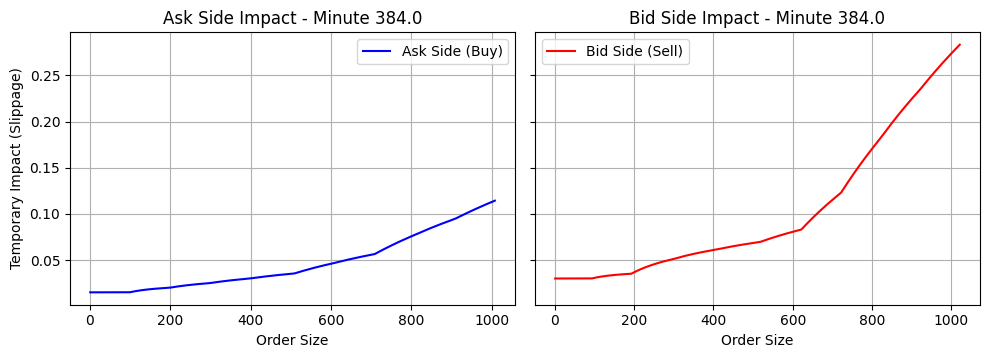

Minute 385.0 - Sell Side: [(101.0, 33.04), (101.0, 33.06), (102.5, 33.07), (100.0, 33.08), (100.0, 33.09), (100.0, 33.11), (100.0, 33.12), (100.0, 33.14), (100.0, 33.15), (100.0, 33.19)]
Minute 385.0 - Buy Side [(109.0, 31.03), (104.0, 31.02), (105.0, 31.01), (100.0, 31.0), (100.0, 30.99), (100.0, 30.97), (103.0, 30.96), (126.0, 30.92), (100.0, 30.91), (100.0, 30.88)]


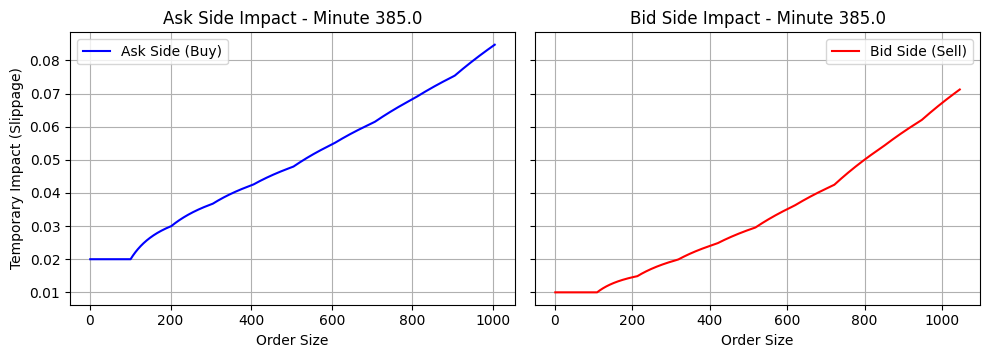

Minute 386.0 - Sell Side: [(121.0, 31.01), (131.0, 31.02), (130.0, 31.03), (100.0, 31.04), (102.0, 31.05), (101.0, 31.06), (100.0, 31.08), (110.0, 31.1), (200.0, 31.12), (110.0, 31.14)]
Minute 386.0 - Buy Side [(119.0, 33.87), (109.0, 33.86), (145.0, 33.85), (120.0, 33.82), (110.0, 33.81), (100.0, 33.8), (103.0, 33.77), (110.0, 33.75), (200.0, 33.74), (106.0, 33.71)]


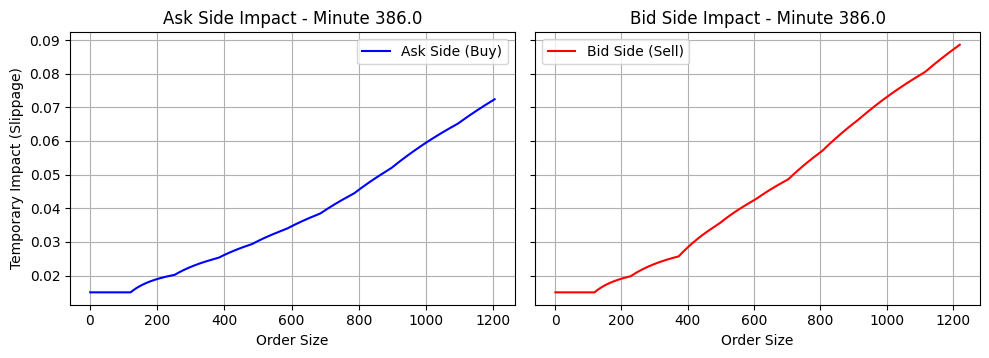

Minute 387.0 - Sell Side: [(200.0, 30.42), (207.0, 30.43), (143.0, 30.44), (121.0, 30.45), (111.0, 30.46), (100.0, 30.47), (112.0, 30.48), (164.0, 30.49), (200.0, 30.5), (200.0, 30.51)]
Minute 387.0 - Buy Side [(209.0, 27.98), (245.0, 27.97), (221.0, 27.96), (150.0, 27.95), (200.0, 27.94), (148.0, 27.9), (200.0, 27.86), (300.0, 27.82), (200.0, 27.74), (200.0, 27.64)]


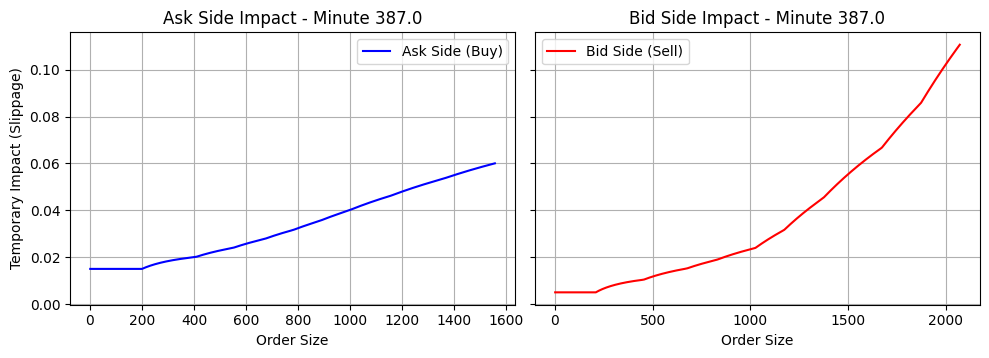

Minute 388.0 - Sell Side: [(327.0, 33.14), (232.0, 33.15), (146.0, 33.16), (141.0, 33.17), (143.0, 33.18), (105.0, 33.19), (157.0, 33.2), (200.0, 33.21), (300.0, 33.24), (250.0, 33.29)]
Minute 388.0 - Buy Side [(474.0, 33.12), (304.0, 33.11), (266.0, 33.1), (292.0, 33.09), (400.0, 33.08), (200.0, 33.06), (300.0, 33.05), (400.0, 33.04), (400.0, 33.01), (400.0, 33.0)]


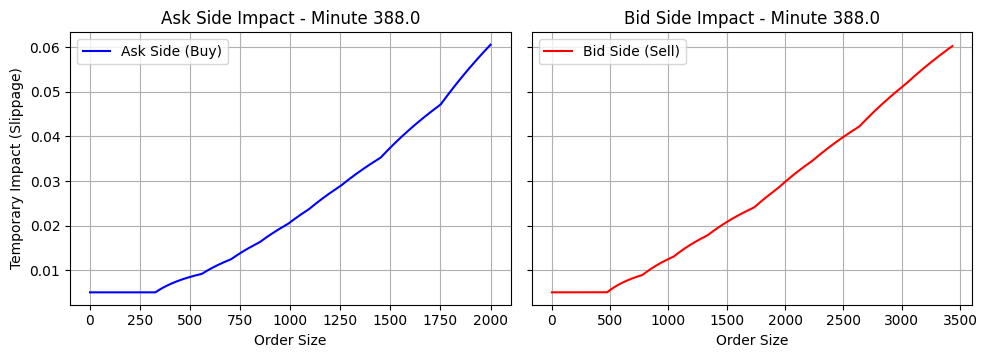

Minute 389.0 - Sell Side: [(260.0, 33.25), (206.0, 33.26), (193.0, 33.27), (150.0, 33.29), (124.0, 33.38), (174.0, 33.39), (300.0, 33.4), (500.0, 33.42), (500.0, 33.44), (600.0, 33.45)]
Minute 389.0 - Buy Side [(373.0, 30.98), (500.0, 30.96), (300.0, 30.92), (300.0, 30.91), (300.0, 30.9), (400.0, 30.88), (400.0, 30.86), (500.0, 30.83), (500.0, 30.76), (600.0, 30.74)]


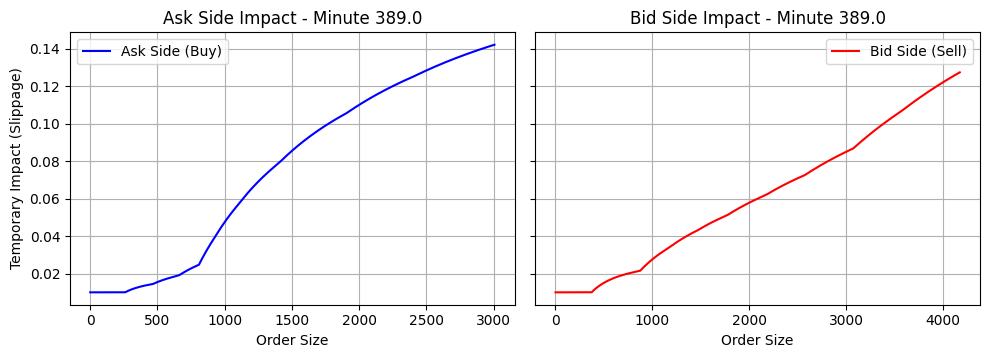

In [28]:
plot_temporary_impact(frog_df, indices=range(380,390))

Minute 380.0 - Sell Side: [(3600.0, 8.64), (6207.0, 8.65), (5585.0, 8.66), (5202.0, 8.67), (5302.0, 8.68), (4495.0, 8.69), (4011.0, 8.7), (3200.0, 8.71), (3000.0, 8.72), (2900.0, 8.73)]
Minute 380.0 - Buy Side [(3714.0, 9.38), (6422.0, 9.37), (5805.0, 9.36), (5425.0, 9.35), (5360.0, 9.34), (5021.0, 9.33), (3900.0, 9.32), (3400.0, 9.31), (3260.0, 9.3), (2810.0, 9.29)]


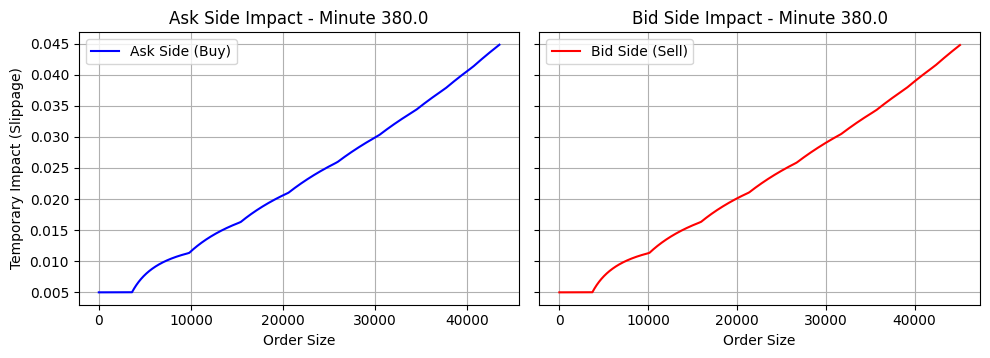

Minute 381.0 - Sell Side: [(4543.0, 8.63), (6922.0, 8.64), (6450.0, 8.65), (5202.0, 8.66), (5394.0, 8.67), (5554.0, 8.68), (4000.0, 8.69), (3111.0, 8.7), (2803.0, 8.71), (2605.0, 8.72)]
Minute 381.0 - Buy Side [(4409.0, 8.18), (6493.0, 8.17), (5570.0, 8.16), (5802.0, 8.15), (5878.0, 8.14), (6019.0, 8.13), (4155.0, 8.12), (3410.0, 8.11), (3200.0, 8.1), (3162.0, 8.09)]


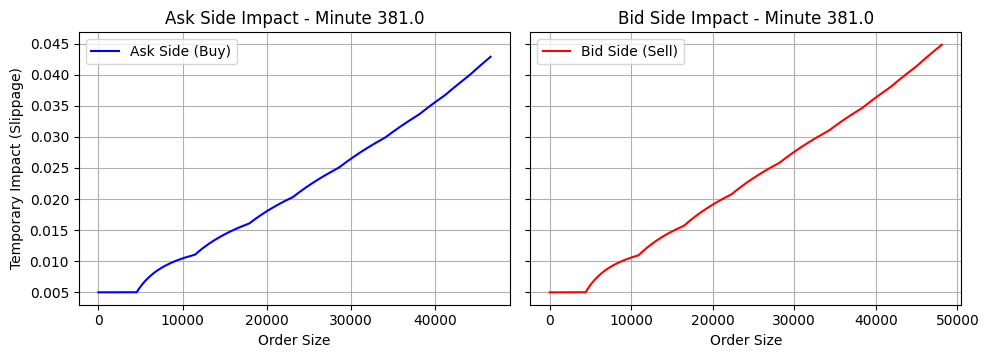

Minute 382.0 - Sell Side: [(4277.0, 7.26), (6988.0, 7.27), (6120.0, 7.28), (5944.0, 7.29), (5650.0, 7.3), (5610.0, 7.31), (4446.0, 7.32), (3111.0, 7.33), (2803.0, 7.35), (2605.0, 7.36)]
Minute 382.0 - Buy Side [(4638.0, 9.18), (6493.0, 9.17), (5868.0, 9.16), (5606.0, 9.15), (5923.0, 9.14), (6101.0, 9.13), (4205.0, 9.12), (3419.0, 9.11), (2903.0, 9.1), (2500.0, 9.09)]


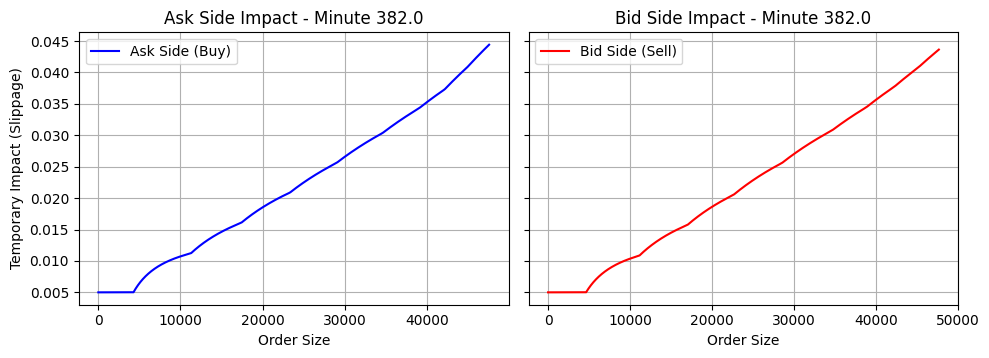

Minute 383.0 - Sell Side: [(4535.0, 9.5), (7896.0, 9.51), (6410.0, 9.52), (6500.0, 9.53), (6170.0, 9.54), (5800.0, 9.55), (4500.0, 9.56), (3160.0, 9.57), (2875.0, 9.58), (2605.0, 9.59)]
Minute 383.0 - Buy Side [(4535.0, 9.81), (7000.0, 9.8), (6094.0, 9.79), (6023.0, 9.78), (5870.0, 9.77), (6202.0, 9.76), (4568.0, 9.75), (3796.0, 9.74), (3002.0, 9.73), (2814.0, 9.72)]


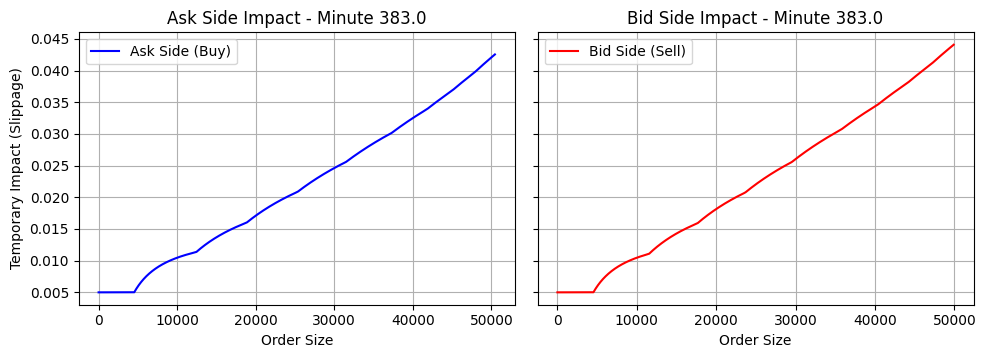

Minute 384.0 - Sell Side: [(4332.0, 7.85), (6997.0, 7.86), (6485.0, 7.87), (5619.0, 7.88), (5613.0, 7.89), (5676.0, 7.9), (4300.0, 7.91), (3310.0, 7.92), (3264.0, 7.93), (2769.0, 7.94)]
Minute 384.0 - Buy Side [(4559.0, 8.26), (6780.0, 8.25), (6301.0, 8.24), (5774.0, 8.23), (5520.0, 8.22), (5278.0, 8.21), (4503.0, 8.2), (3288.0, 8.19), (2944.0, 8.18), (2864.0, 8.17)]


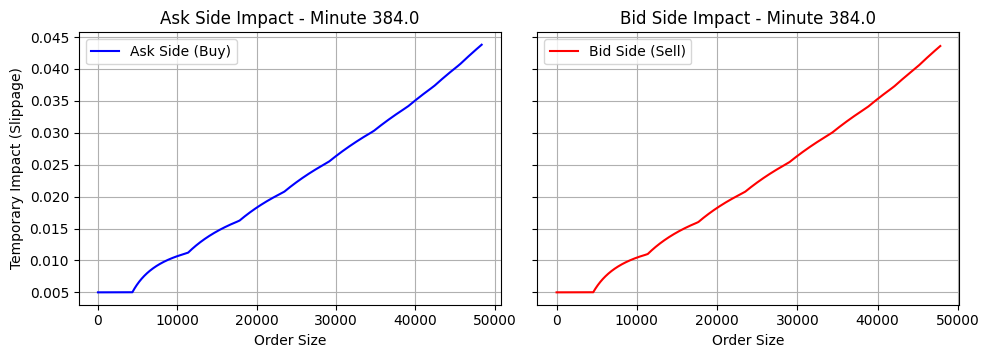

Minute 385.0 - Sell Side: [(4897.0, 9.8), (7391.0, 9.81), (6329.0, 9.82), (6286.0, 9.83), (6600.0, 9.84), (6501.0, 9.85), (4901.0, 9.86), (3705.0, 9.87), (3700.0, 9.88), (3226.0, 9.89)]
Minute 385.0 - Buy Side [(4900.0, 9.28), (7063.0, 9.27), (7207.0, 9.26), (6501.0, 9.25), (6454.0, 9.24), (6283.0, 9.23), (4900.0, 9.22), (3664.0, 9.21), (2930.0, 9.2), (2600.0, 9.19)]


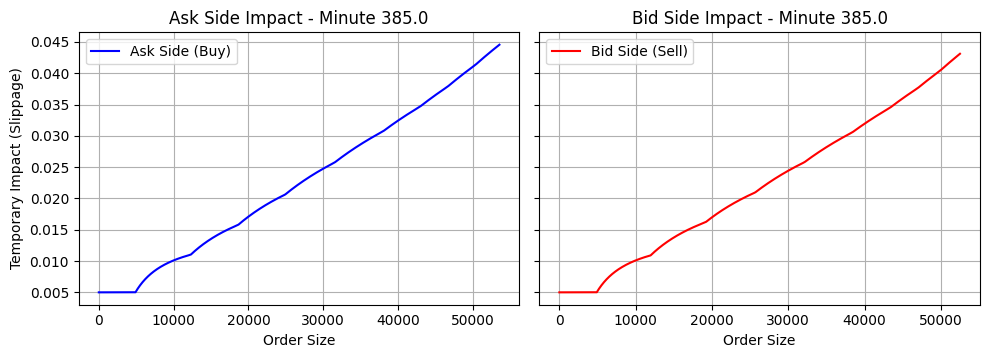

Minute 386.0 - Sell Side: [(7038.0, 8.73), (8220.0, 8.74), (7357.0, 8.75), (7600.0, 8.76), (8008.0, 8.77), (6805.0, 8.78), (5210.0, 8.79), (3849.0, 8.8), (3256.0, 8.81), (2948.0, 8.82)]
Minute 386.0 - Buy Side [(7904.5, 8.75), (8462.0, 8.74), (8800.0, 8.73), (7803.0, 8.72), (6706.0, 8.71), (7220.0, 8.7), (5700.0, 8.69), (4378.0, 8.68), (3335.0, 8.67), (2325.0, 8.66)]


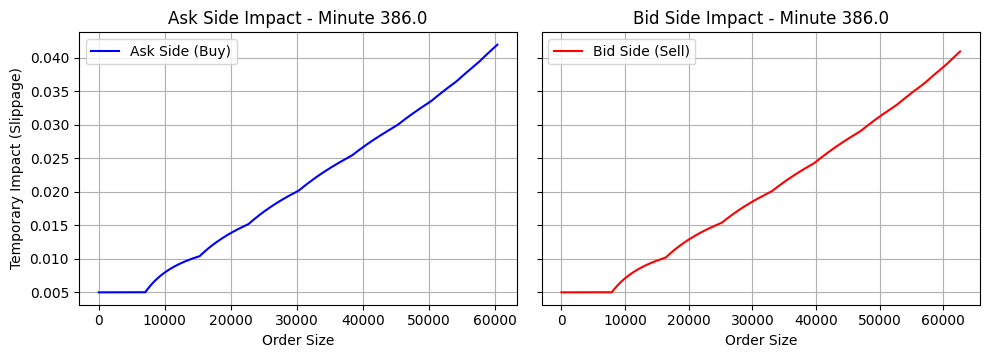

Minute 387.0 - Sell Side: [(10242.5, 8.22), (8960.0, 8.23), (8550.0, 8.24), (8994.0, 8.25), (8506.0, 8.26), (7800.0, 8.27), (7380.0, 8.28), (4840.0, 8.29), (3402.0, 8.3), (3400.0, 8.31)]
Minute 387.0 - Buy Side [(14013.0, 9.77), (9918.0, 9.76), (8676.0, 9.75), (8284.0, 9.74), (6980.0, 9.73), (6749.0, 9.72), (6878.0, 9.71), (4690.0, 9.7), (3524.0, 9.69), (3501.0, 9.68)]


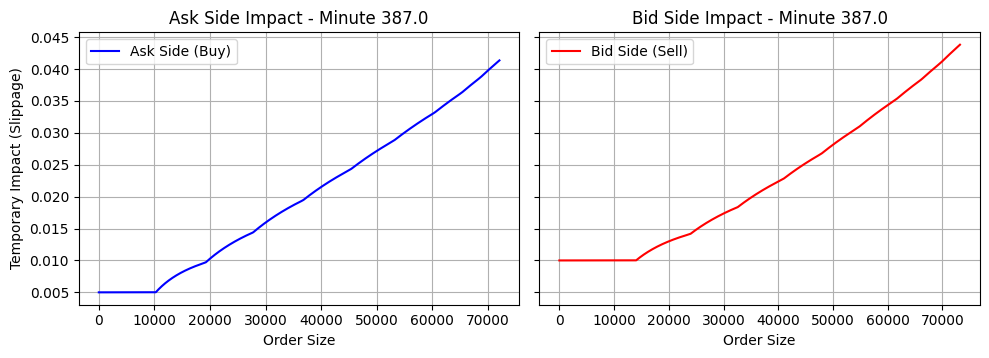

Minute 388.0 - Sell Side: [(12259.0, 9.47), (10699.0, 9.48), (9610.0, 9.49), (11900.0, 9.5), (10302.0, 9.51), (12280.0, 9.52), (13715.0, 9.53), (21210.0, 9.54), (12770.0, 9.55), (8511.0, 9.56)]
Minute 388.0 - Buy Side [(18946.0, 7.11), (11022.0, 7.1), (11471.0, 7.09), (10806.0, 7.08), (9503.0, 7.07), (13976.0, 7.06), (14123.0, 7.05), (19500.0, 7.04), (7145.0, 7.03), (3435.0, 7.02)]


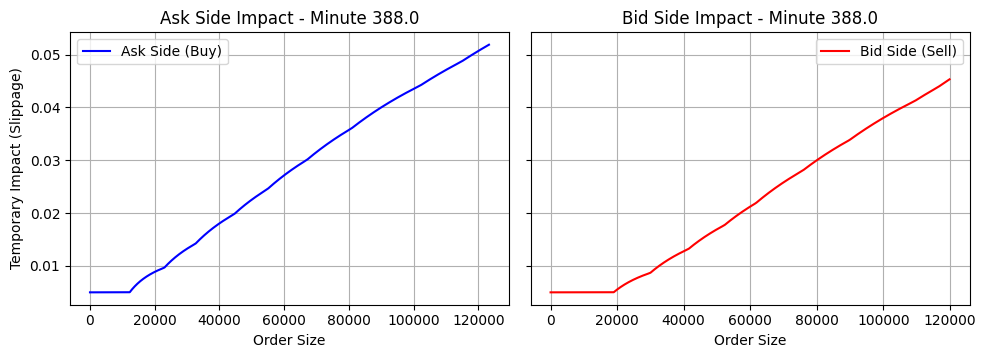

Minute 389.0 - Sell Side: [(13821.0, 9.3), (12386.0, 9.31), (11245.0, 9.32), (11506.0, 9.33), (13302.0, 9.34), (15626.0, 9.35), (19619.0, 9.36), (22996.0, 9.37), (21375.0, 9.38), (23525.0, 9.39)]
Minute 389.0 - Buy Side [(18480.0, 7.61), (13182.0, 7.6), (12132.0, 7.59), (11058.0, 7.58), (14999.0, 7.57), (12701.0, 7.56), (20600.0, 7.55), (18301.0, 7.54), (8817.0, 7.53), (8087.0, 7.52)]


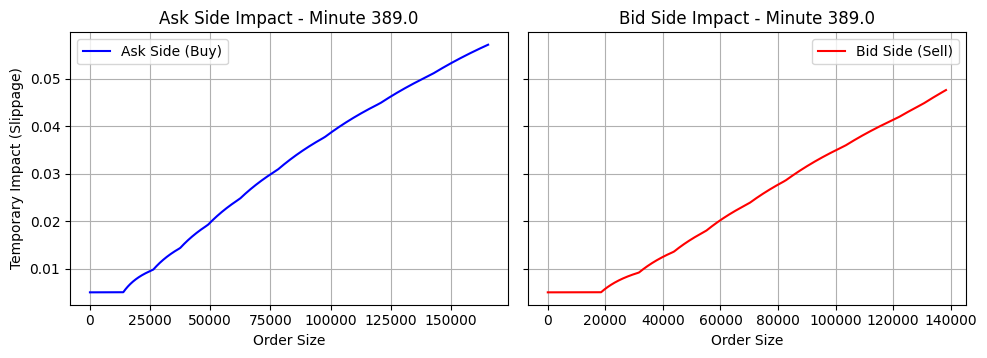

In [29]:
plot_temporary_impact(soun_df, indices=range(380,390))

## Observations
- Towards the start of the market, the book is wider with higher average temporary impact
- Towards the end of the market, the book is very thin and temporary impact is lower
- When the spread is not large, temporary impact seems to follow a ReLU like pattern (constant upto a certain threshold, increases linearly afterwards)
- We can model the temporary impact as g<sub>t</sub>(x) = a<sub>t</sub> + b<sub>t</sub> * max(0, x - c<sub>t</sub>), where each of the N (=390) windows would have different set of coefficients
- Since the temporary impact depends on difference between the levels and not their actual values, we could choose to either use different coefficients for different tickets or use the same set of coefficients for all the tickers